## Project Name : Airbnb Bookings Analysis

## Problem statement :- 
#### The hospitality industry has undergone significant transformation due to the rise of online platforms like Airbnb. While Airbnb provides flexible lodging options, both hosts and guests face challenges: 
- Hosts struggle to set competitive pricing, maximize occupancy, and maintain positive reviews. 
- Guests aim to find affordable, safe, and quality stays. 
#### Therefore, this project analyzes Airbnb booking data to: 
- Identify factors influencing successful bookings. 
- Understand guest behavior and preferences. 
- Explore host performance metrics. 
- Provide data-driven insights for improved decision-making.

### Objectives of the analysis:

1. Category 1: Univariate Analysis

    - Price distribution with 4 visualization types
    - Availability patterns analysis
    - Review frequency distributions
    - Listing age analysis by decade
    - Host portfolio size analysis
    - Minimum nights requirements

2. Category 2: Bivariate Analysis 

    - Price vs Location (neighbourhoods)
    - Room type pricing strategies
    - Verification impact on reviews (with Mann-Whitney U test)
    - Instant booking vs pricing (with t-test)
    - Cancellation policy impact
    - Service fee relationships (with Pearson/Spearman correlation)
    - Reviews vs availability analysis
    - Property age vs price
    - Minimum nights vs reviews
    - Host performance metrics

3. Category 3: Multivariate Analysis 

    - Geographical price mapping (2D heatmaps)
    - Room type performance by location
    - Verification + Instant booking + Pricing (with ANOVA)
    - Policy-Price-Reviews nexus (3D visualizations)
    - Temporal-Spatial-Price analysis
    - Host performance dashboard
    - Availability-Price-Reviews relationships
    - Country-wise comprehensive comparisons

4. Category 4: Distribution & Skewness 

    - Price normality tests (Shapiro-Wilk, Anderson-Darling)
    - Review metrics skewness analysis
    - Service fee distribution tests (Kolmogorov-Smirnov)
    - Comparative distribution analysis (Levene's, Kruskal-Wallis)
    - Q-Q plots for all major metrics

5. Category 5: Advanced Statistical Analysis 

    - Price segmentation & profiling
    - Time-based review patterns (seasonal analysis)
    - Complete correlation matrix with multicollinearity detection
    - Pair plots for key variables

## Let's begin

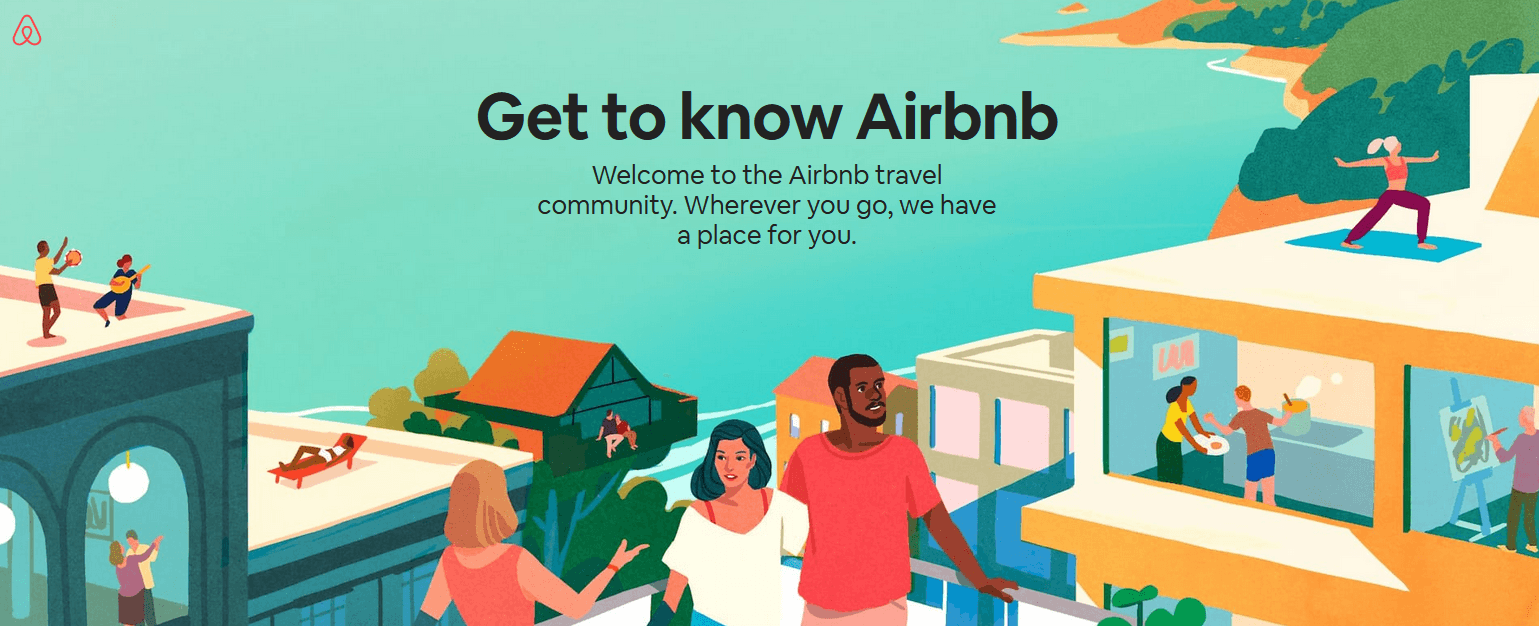

### Import necessary libraries

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, anderson, skew, kurtosis, mannwhitneyu, pearsonr, spearmanr, f_oneway, kstest, levene, kruskal
import datetime
import warnings
warnings.filterwarnings("ignore")

In [246]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 10

## Plan

1. Load & inspect data
2. Clean & normalize
3. EDA for the objectives

### Load & inspect the data

In [248]:
xls = pd.ExcelFile("1730285881-Airbnb_Open_Data.xlsx")
df = pd.read_excel(xls)
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73.97237  United States  ...       193.0            10.0   
1  40.75362 -73.98377  United States  ...        28.0            30.0   
2  40.80902 -73.94190  United States  ...       124.0             3.0   
3  40.68514 -73.95976  United States  ...        74.0            30.0   
4  40.79851 -73.94399  United States  ...        41.0            10.0   

  number of reviews last review  reviews per month  review rate number  \
0               9.0  2021-10-19               0.21                 4.0   
1              45.0  2022-05-21               0.38                 4.0   
2               0.0         NaT                NaN                 5.0   
3             270.0  2019-07-05               4.64                 4.0   
4               9.0  2018-11-19               0.10                 3.0   

   calculated host listings count  availability 365  \
0                             6.0             286.0   
1                             2.0             228.0   
2                             1.0             352.0   
3                             1.0             322.0   
4                             1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [249]:
df.shape

(102599, 26)

In [250]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [251]:
df.describe()

id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   

       instant_bookable  Construction year          price    service fee  \
count     102494.000000      102385.000000  102352.000000  102326.000000   
mean           0.497785        2012.487464     625.293536     125.026924   
min            0.000000        2003.000000      50.000000      10.000000   
25%            0.000000        2007.000000     340.000000      68.000000   
50%            0.000000        2012.000000     624.000000     125.000000   
75%            1.000000        2017.000000     913.000000     183.000000   
max            1.000000        2022.000000    1200.000000     240.000000   
std            0.499998           5.765556     331.671614      66.325739   

       minimum nights  number of reviews                    last review  \
count   102190.000000      102416.000000                          86706   
mean         8.135845          27.483743  2019-06-12 03:40:52.065601024   
min      -1223.000000           0.000000            2012-07-11 00:00:00   
25%          2.000000           1.000000            2018-10-28 00:00:00   
50%          3.000000           7.000000            2019-06-14 00:00:00   
75%          5.000000          30.000000            2019-07-05 00:00:00   
max       5645.000000        1024.000000            2058-06-16 00:00:00   
std         30.553781          49.508954                            NaN   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   
std             1.746621            1.284657                       32.218780   

       availability 365  
count     102151.000000  
mean         141.133254  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000  
std          135.435024

In [252]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


In [253]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [254]:
df.isna().sum().sort_values()

id                                     0
host id                                0
room type                              0
lat                                    8
long                                   8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
country code                         131
number of reviews                    183
Construction year                    214
price                                247
NAME                                 270
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            408
minimum nights                       409
availability 365                     448
country                              532
reviews per month                  15879
last review                        15893
house_rules     

### Outcomes :
1. Got to know about columns names and data types:
   - **id(int64)**: unique identifier for each listing in the dataset
   - **NAME(object)**: name/title of the listing
   - **host id(int64)**: unique identifier for each host
   - **host_identity_verified(object)**: whether host is verified or not
   - **host name(object)**: name of the host
   - **neighbourhood group(object)**: grouping of neighborhoods (Manhattan, Brooklyn, etc.)
   - **neighbourhood(object)**: specific neighborhood of the listing
   - **lat(float64)**: latitude
   - **long(float64)**: longitude
   - **country(object)**: country name
   - **country code(object)**: code of the country
   - **instant_bookable(float64)**: whether the property is instantly bookable or not
   - **cancellation_policy(object)**: what's the property cancellation policy (strict, moderate or etc)
   - **room type(object)**: type of property (entire home, private room, shared room)
   - **Construction year(float64)**: In which year is the property constructed
   - **price(float64)**: nightly price (USD)
   - **service fee(float64)**: service charges (USD)
   - **minimum nights(float64)**: minimum stay required
   - **number of reviews(float64)**: total reviews received
   - **last review(datetime64)**: when was the last review
   - **reviews per month(float64)**: average reviews per month
   - **review rate number(float64)**
   - **calculated host listings count(float64)**: number of listings by host
   - **availability 365(float64)**: available days in next year
   - **House rules(object)**
   - **License(object)**
2. Got to know about the statistical information of the data.
3. Got to know about duplicate values in the data.
4. Got to know about null values in the data.

### Data cleaning & normalization

In [255]:
df = df.rename(columns=lambda c: str(c).strip().lower().replace(" ", "_").replace("-", "_"))

for col in df.select_dtypes(include=['datetime64']):
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [256]:
for col in df.columns:
    if col == 'price' or col == 'service_fee':
        df[col] = df[col].astype(str).str.replace(r"[^0-9.\-]", "", regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [257]:
df.drop_duplicates(inplace=True)

In [258]:
missing_frac = df.isna().mean()
drop_cols = missing_frac[missing_frac > 0.5].index.tolist()
print(f"Dropping {len(drop_cols)} columns (>{0.5*100:.0f}% missing):", drop_cols)
df.drop(columns=drop_cols, inplace=True)
df.isna().sum().sort_values()

Dropping 2 columns (>50% missing): ['house_rules', 'license']


id                                    0
host_id                               0
room_type                             0
lat                                   8
long                                  8
neighbourhood                        16
neighbourhood_group                  29
cancellation_policy                  76
instant_bookable                    105
country_code                        131
number_of_reviews                   183
construction_year                   214
price                               247
name                                270
service_fee                         273
host_identity_verified              289
calculated_host_listings_count      319
review_rate_number                  319
minimum_nights                      400
host_name                           406
availability_365                    448
country                             532
reviews_per_month                 15818
last_review                       15832
dtype: int64

In [259]:
df.describe()

id       host_id            lat           long  \
count  1.020580e+05  1.020580e+05  102050.000000  102050.000000   
mean   2.918438e+07  4.926738e+10      40.728097     -73.949652   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.509286e+07  2.459924e+10      40.688730     -73.982580   
50%    2.918438e+07  4.912865e+10      40.722290     -73.954440   
75%    4.327590e+07  7.400619e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   
std    1.627173e+07  2.853742e+10       0.055852       0.049502   

       instant_bookable  construction_year          price    service_fee  \
count     101953.000000      101844.000000  101811.000000  101785.000000   
mean           0.497945        2012.488090     625.355580     125.039249   
min            0.000000        2003.000000      50.000000      10.000000   
25%            0.000000        2007.000000     340.000000      68.000000   
50%            0.000000        2012.000000     625.000000     125.000000   
75%            1.000000        2017.000000     913.000000     183.000000   
max            1.000000        2022.000000    1200.000000     240.000000   
std            0.499998           5.765838     331.672649      66.325905   

       minimum_nights  number_of_reviews                    last_review  \
count   101658.000000      101875.000000                          86226   
mean         8.126640          27.517948  2019-06-11 02:12:22.996312064   
min      -1223.000000           0.000000            2012-07-11 00:00:00   
25%          2.000000           1.000000            2018-10-27 00:00:00   
50%          3.000000           7.000000            2019-06-13 00:00:00   
75%          5.000000          31.000000            2019-07-05 00:00:00   
max       5645.000000        1024.000000            2058-06-16 00:00:00   
std         30.616698          49.571744                            NaN   

       reviews_per_month  review_rate_number  calculated_host_listings_count  \
count       86240.000000       101739.000000                   101739.000000   
mean            1.375408            3.278733                        7.936937   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.010000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   
std             1.748019            1.285089                       32.266355   

       availability_365  
count     101610.000000  
mean         141.043992  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          268.000000  
max         3677.000000  
std          135.429156

In [260]:
df = df[(df['availability_365'] >= 0) & (df['availability_365'] <= 365)]
df = df[df['last_review'] <= datetime.datetime.today()]
df = df[(df['minimum_nights'] > 0) & (df['minimum_nights'] <= 365)]

In [261]:
df.describe()

id       host_id           lat          long  \
count  8.312100e+04  8.312100e+04  83114.000000  83114.000000   
mean   3.011784e+07  4.919128e+10     40.727347    -73.948259   
min    1.001254e+06  1.236005e+08     40.504560    -74.249840   
25%    1.640333e+07  2.447461e+10     40.687660    -73.982070   
50%    3.134912e+07  4.905752e+10     40.721300    -73.953580   
75%    4.351850e+07  7.384262e+10     40.762570    -73.930510   
max    5.736742e+07  9.876313e+10     40.916970    -73.705220   
std    1.598180e+07  2.852998e+10      0.056433      0.050623   

       instant_bookable  construction_year         price   service_fee  \
count      83055.000000       82976.000000  82910.000000  82889.000000   
mean           0.497694        2012.491419    626.696237    125.301717   
min            0.000000        2003.000000     50.000000     10.000000   
25%            0.000000        2007.000000    341.000000     68.000000   
50%            0.000000        2012.000000    626.000000    125.000000   
75%            1.000000        2018.000000    914.000000    183.000000   
max            1.000000        2022.000000   1200.000000    240.000000   
std            0.499998           5.763964    331.615048     66.319042   

       minimum_nights  number_of_reviews                    last_review  \
count    83121.000000       83064.000000                          83121   
mean         7.254845          32.026341  2019-06-25 00:22:22.967481088   
min          1.000000           1.000000            2012-07-11 00:00:00   
25%          2.000000           3.000000            2018-11-09 00:00:00   
50%          3.000000          11.000000            2019-06-15 00:00:00   
75%          5.000000          38.000000            2019-07-06 00:00:00   
max        365.000000        1024.000000            2022-05-21 00:00:00   
std         15.326290          51.612748                            NaN   

       reviews_per_month  review_rate_number  calculated_host_listings_count  \
count       83111.000000        82878.000000                    82881.000000   
mean            1.389714            3.287483                        7.123985   
min             0.010000            1.000000                        1.000000   
25%             0.230000            2.000000                        1.000000   
50%             0.760000            3.000000                        1.000000   
75%             2.030000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   
std             1.756541            1.277881                       29.794353   

       availability_365  
count      83121.000000  
mean         135.643808  
min            0.000000  
25%            5.000000  
50%           94.000000  
75%          253.000000  
max          365.000000  
std          128.382057

In [262]:
df['review_rate_number'].fillna(0, inplace=True)
df['number_of_reviews'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

In [263]:
df.isna().sum().sort_values()

id                                  0
host_id                             0
room_type                           0
availability_365                    0
reviews_per_month                   0
last_review                         0
number_of_reviews                   0
minimum_nights                      0
review_rate_number                  0
lat                                 7
long                                7
neighbourhood                      12
neighbourhood_group                14
cancellation_policy                50
instant_bookable                   66
country_code                       89
construction_year                 145
name                              199
price                             211
host_identity_verified            218
service_fee                       232
calculated_host_listings_count    240
host_name                         314
country                           472
dtype: int64

In [264]:
df.isna().sum().sum()

np.int64(2276)

In [265]:
print("Total null values present: {}%".format(((df.isna().sum().sum()*100)/df.shape[0]).round()))
# I think we can safely drop the NaN values since they are around 3% (2.711...% actaully)

Total null values present: 3.0%


In [266]:
df.dropna(inplace=True)

In [267]:
df.isna().sum().sort_values()

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country_code                      0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [268]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_identity_verified                    object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country_code                              object
instant_bookable                         float64
cancellation_policy                       object
room_type                                 object
construction_year                        float64
price                                    float64
service_fee                              float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month   

In [269]:
# Boolean
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False}).astype(bool)
df['instant_bookable'] = df['instant_bookable'].map({1: True, 0: False, 't': True, 'f': False}).astype(bool)

# Integer (nullable Int64 to safely handle any remaining NaNs)
int_cols = [
    'id',
    'host_id',
    'construction_year',
    'minimum_nights',
    'number_of_reviews',
    'review_rate_number',
    'calculated_host_listings_count',
    'availability_365'
]
for col in int_cols:
    df[col] = df[col].astype('int64')

# Float
float_cols = ['lat', 'long', 'price', 'service_fee', 'reviews_per_month']
for col in float_cols:
    df[col] = df[col].astype('float64')

# String / Categorical
cat_cols = [
    'name',
    'host_name',
    'neighbourhood_group',
    'neighbourhood',
    'country',
    'country_code',
    'cancellation_policy',
    'room_type'
]
for col in cat_cols:
    df[col] = df[col].astype(str)

# Date
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Verify
print(df.dtypes)


id                                         int64
name                                      object
host_id                                    int64
host_identity_verified                      bool
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country_code                              object
instant_bookable                            bool
cancellation_policy                       object
room_type                                 object
construction_year                          int64
price                                    float64
service_fee                              float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month   

In [270]:
df['country'].value_counts()

country
United States    81122
Name: count, dtype: int64

In [271]:
df['country_code'].value_counts()

country_code
US    81122
Name: count, dtype: int64

In [272]:
df['neighbourhood'].value_counts()

neighbourhood
Bedford-Stuyvesant        6583
Williamsburg              6133
Harlem                    4387
Bushwick                  3887
Hell's Kitchen            3104
                          ... 
Gerritsen Beach              3
Glen Oaks                    2
Woodrow                      1
Chelsea, Staten Island       1
New Dorp                     1
Name: count, Length: 223, dtype: int64

In [273]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Brooklyn         33627
Manhattan        33506
Queens           10938
Bronx             2248
Staten Island      802
brookln              1
Name: count, dtype: int64

In [274]:
df.loc[df['neighbourhood_group'] == 'brookln', 'neighbourhood_group'] = 'Brooklyn'

In [275]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Brooklyn         33628
Manhattan        33506
Queens           10938
Bronx             2248
Staten Island      802
Name: count, dtype: int64

In [276]:
df['host_identity_verified'].value_counts()

host_identity_verified
True    81122
Name: count, dtype: int64

In [277]:
df['country'].value_counts()

country
United States    81122
Name: count, dtype: int64

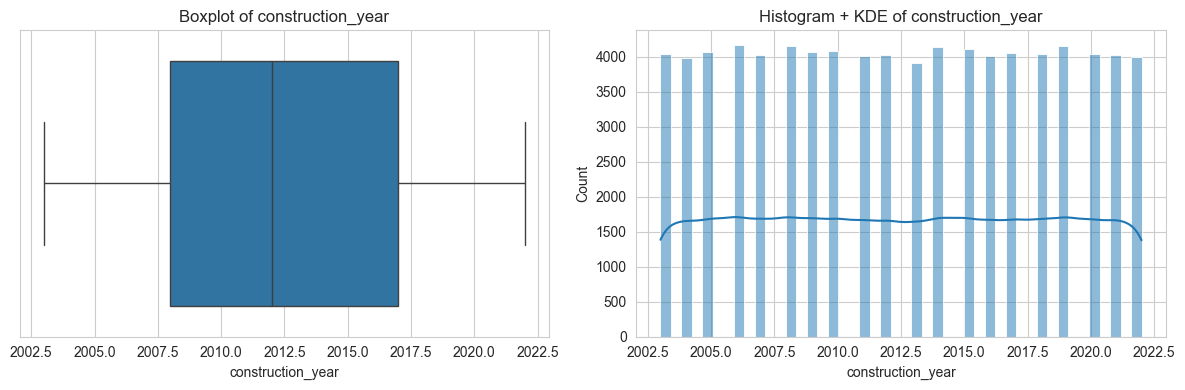

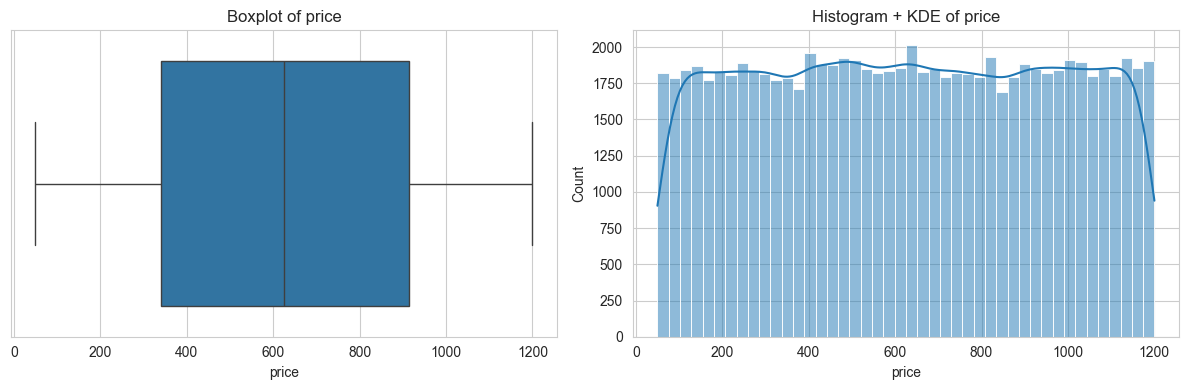

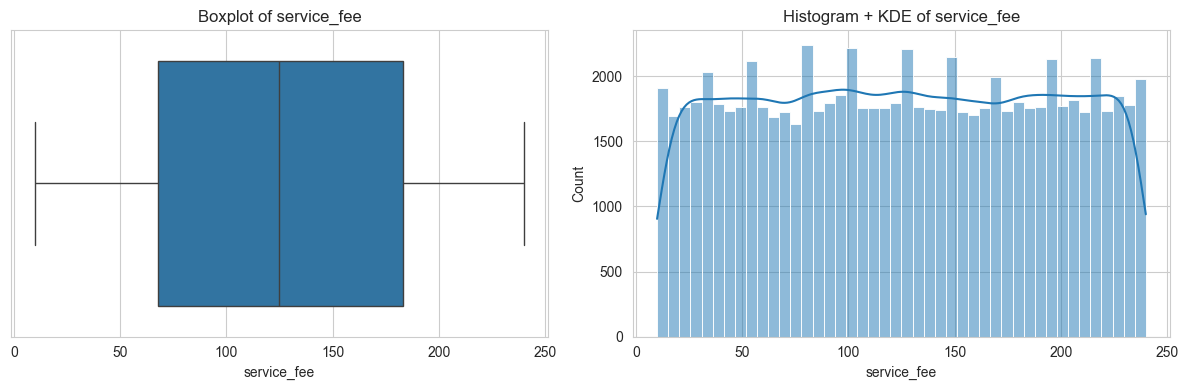

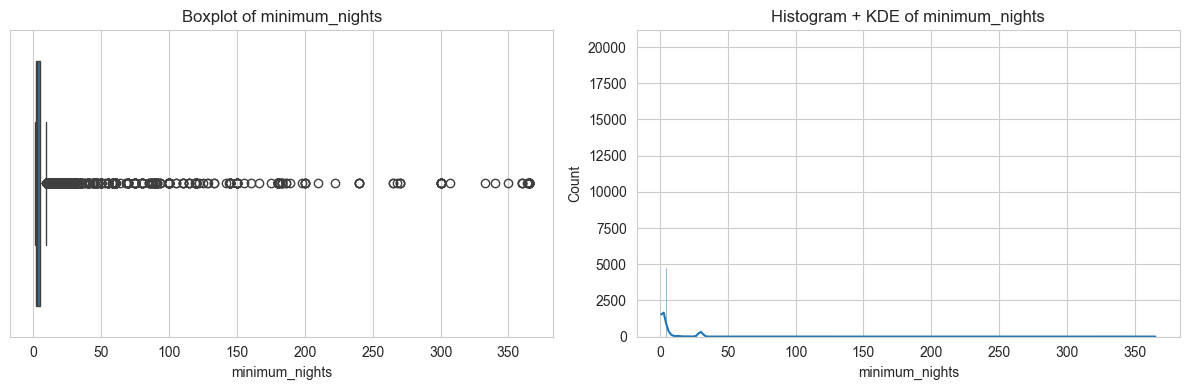

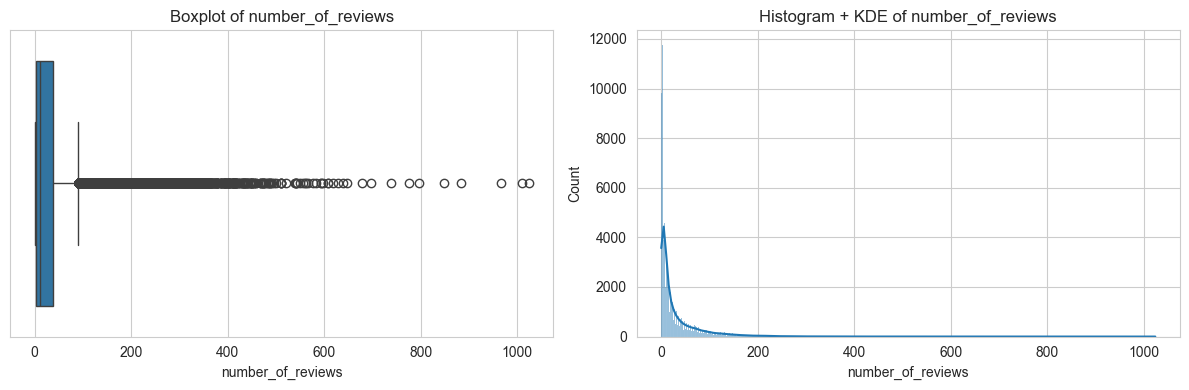

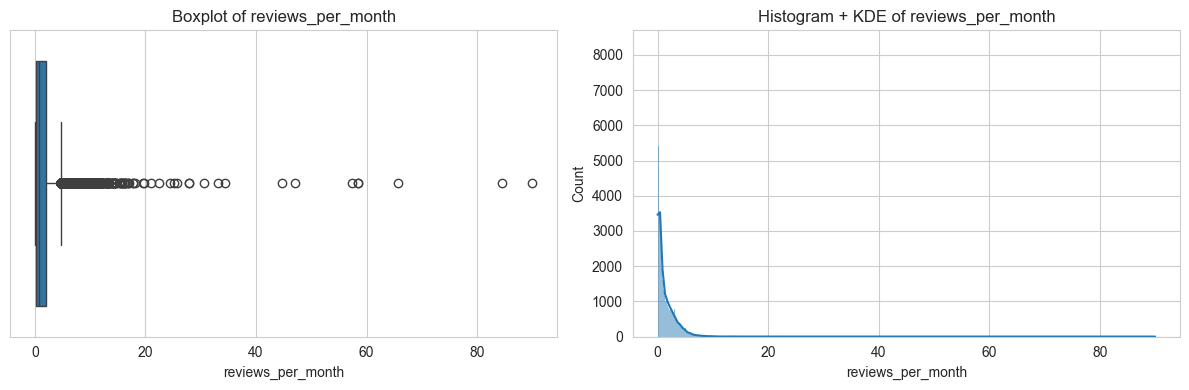

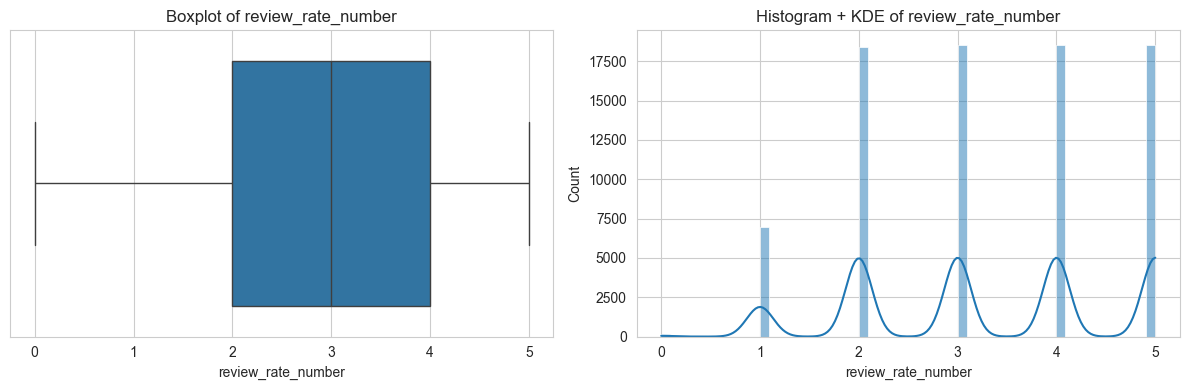

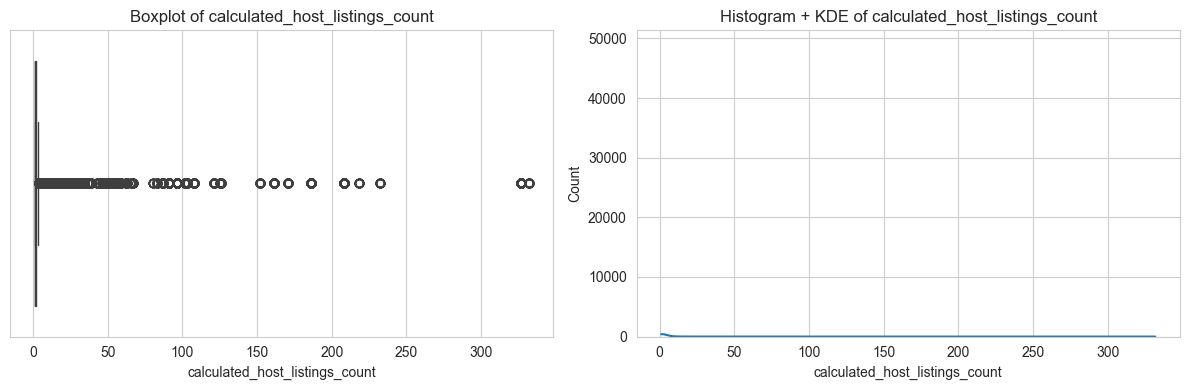

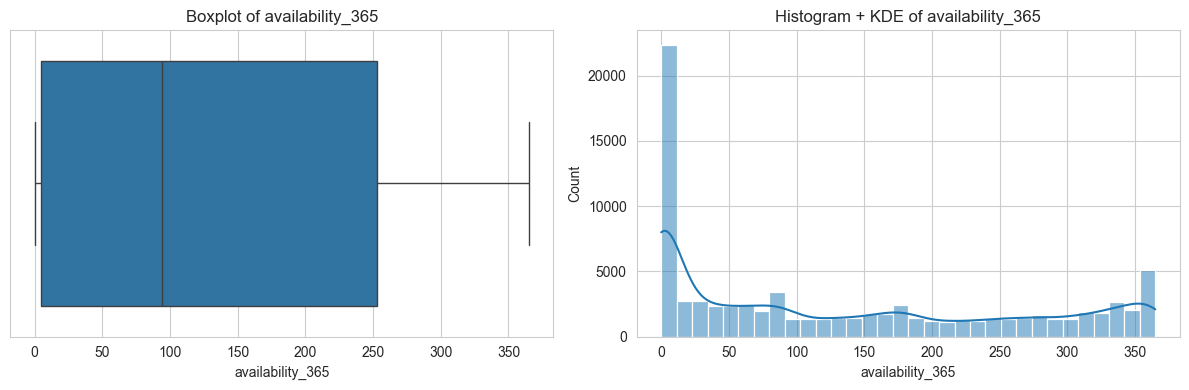

In [163]:
def plot_outlier_distributions(df):
    exclude_cols = ['id', 'host_id', 'lat', 'long']
    num_cols = [col for col in df.select_dtypes(include=['int64','float64']).columns if col not in exclude_cols]

    for col in num_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[0])
        axes[0].set_title(f'Boxplot of {col}')

        # Histogram with KDE
        sns.histplot(df[col], kde=True, ax=axes[1])
        axes[1].set_title(f'Histogram + KDE of {col}')

        plt.tight_layout()
        plt.show()

plot_outlier_distributions(df)

In [278]:
def detect_outliers_summary(df):
    exclude_cols = ['id', 'host_id', 'lat', 'long']
    num_cols = [col for col in df.select_dtypes(include=['int64','float64']).columns if col not in exclude_cols]

    outlier_info = {}
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_info[col] = {
            'outliers': int(outliers),
            'percentage': round(outliers / len(df) * 100, 2)
        }

    return pd.DataFrame(outlier_info).T.sort_values(by='percentage', ascending=False)
summary = detect_outliers_summary(df)
print(summary)

                                outliers  percentage
calculated_host_listings_count   14178.0       17.48
minimum_nights                   13230.0       16.31
number_of_reviews                 8043.0        9.91
reviews_per_month                 3730.0        4.60
construction_year                    0.0        0.00
price                                0.0        0.00
service_fee                          0.0        0.00
review_rate_number                   0.0        0.00
availability_365                     0.0        0.00


In [279]:
df[['calculated_host_listings_count', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].describe()

calculated_host_listings_count  minimum_nights  number_of_reviews  \
count                    81122.000000    81122.000000       81122.000000   
mean                         7.118636        7.203927          31.954575   
std                         29.903369       15.090222          51.637840   
min                          1.000000        1.000000           0.000000   
25%                          1.000000        2.000000           3.000000   
50%                          1.000000        3.000000          11.000000   
75%                          2.000000        5.000000          38.000000   
max                        332.000000      365.000000        1024.000000   

       reviews_per_month  
count       81122.000000  
mean            1.393083  
std             1.763754  
min             0.000000  
25%             0.230000  
50%             0.760000  
75%             2.030000  
max            90.000000

#### In hospitatlity bussiness these aren't outliers these are factual data. So removing them might cause data loss which can include important aspects of the dataset. So keep it and do feature engineering

In [280]:
print("\n=== FINAL DATASET SUMMARY ===")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Original numerical columns: PRESERVED (no capping)")

print("\n=== DATA INTEGRITY ===")
print("✅ All original data preserved")
print("✅ No information lost through capping")
print("✅ Business-meaningful features added")
print("✅ Ready for any modeling approach (tree-based, linear, deep learning)")
print("✅ Interpretable features for business insights")


=== FINAL DATASET SUMMARY ===
Total rows: 81,122
Total columns: 24
Original numerical columns: PRESERVED (no capping)

=== DATA INTEGRITY ===
✅ All original data preserved
✅ No information lost through capping
✅ Business-meaningful features added
✅ Ready for any modeling approach (tree-based, linear, deep learning)
✅ Interpretable features for business insights


In [281]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['id', 'host_id']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]
df[numerical_cols].describe().T

count         mean         std         min  \
lat                             81122.0    40.727292    0.056422    40.50456   
long                            81122.0   -73.948218    0.050673   -74.24984   
construction_year               81122.0  2012.492345    5.760680  2003.00000   
price                           81122.0   626.662496  331.743099    50.00000   
service_fee                     81122.0   125.333399   66.351893    10.00000   
minimum_nights                  81122.0     7.203927   15.090222     1.00000   
number_of_reviews               81122.0    31.954575   51.637840     0.00000   
reviews_per_month               81122.0     1.393083    1.763754     0.00000   
review_rate_number              81122.0     3.280047    1.285733     0.00000   
calculated_host_listings_count  81122.0     7.118636   29.903369     1.00000   
availability_365                81122.0   135.684488  128.419786     0.00000   

                                       25%         50%         75%         max  
lat                               40.68762    40.72128    40.76253    40.91697  
long                             -73.98206   -73.95357   -73.93042   -73.70522  
construction_year               2008.00000  2012.00000  2017.00000  2022.00000  
price                            341.00000   626.00000   915.00000  1200.00000  
service_fee                       68.00000   125.00000   183.00000   240.00000  
minimum_nights                     2.00000     3.00000     5.00000   365.00000  
number_of_reviews                  3.00000    11.00000    38.00000  1024.00000  
reviews_per_month                  0.23000     0.76000     2.03000    90.00000  
review_rate_number                 2.00000     3.00000     4.00000     5.00000  
calculated_host_listings_count     1.00000     1.00000     2.00000   332.00000  
availability_365                   5.00000    94.00000   253.00000   365.00000

In [337]:
with pd.ExcelWriter('clean_data.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, index=False)

### Exploratory Data Analysis (EDA)

##### Univariate Analysis


1.1 PRICE DISTRIBUTION ANALYSIS
--------------------------------------------------------------------------------

Price Percentiles:
Min (0%): $50.00
25th percentile (Budget): $341.00
50th percentile (Mid-range): $626.00
75th percentile (Luxury): $915.00
Max (100%): $1200.00


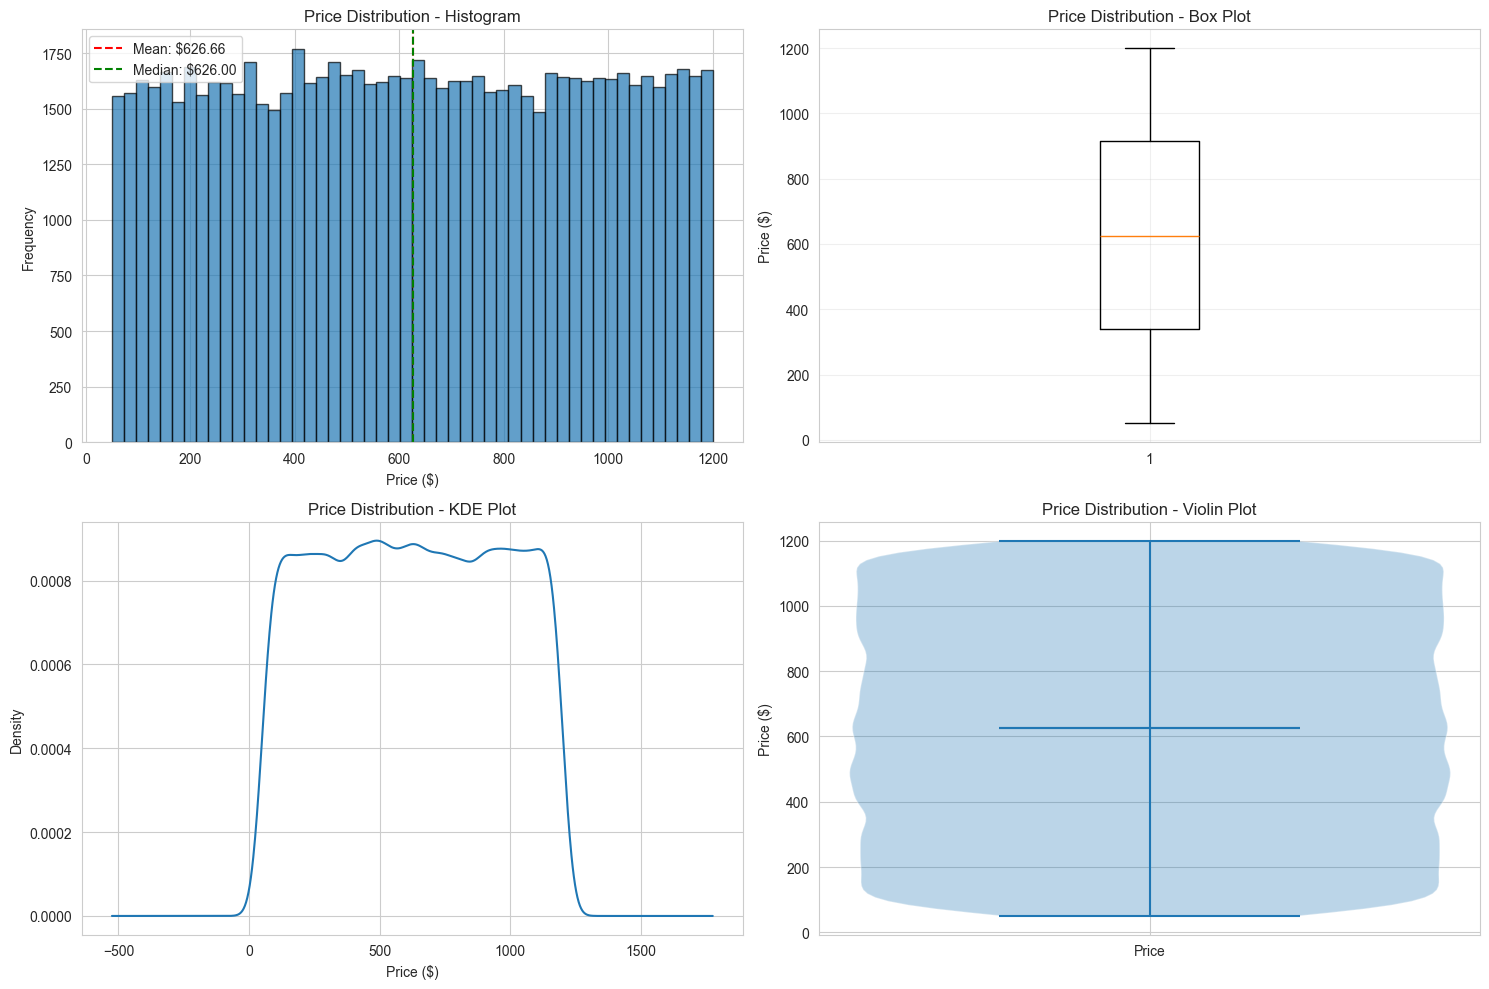

In [289]:
print("\n1.1 PRICE DISTRIBUTION ANALYSIS")
print("-"*80)
price_percentiles = df['price'].quantile([0, 0.25, 0.50, 0.75, 1.0])
print("\nPrice Percentiles:")
print(f"Min (0%): ${price_percentiles[0.0]:.2f}")
print(f"25th percentile (Budget): ${price_percentiles[0.25]:.2f}")
print(f"50th percentile (Mid-range): ${price_percentiles[0.50]:.2f}")
print(f"75th percentile (Luxury): ${price_percentiles[0.75]:.2f}")
print(f"Max (100%): ${price_percentiles[1.0]:.2f}")

df['price_segment'] = pd.cut(df['price'],
                              bins=[0, price_percentiles[0.25], price_percentiles[0.75], float('inf')],
                              labels=['Budget', 'Mid-range', 'Luxury'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Distribution - Histogram')
axes[0, 0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["price"].mean():.2f}')
axes[0, 0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Median: ${df["price"].median():.2f}')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df['price'].dropna(), vert=True)
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Price Distribution - Box Plot')
axes[0, 1].grid(True, alpha=0.3)

# KDE plot
df['price'].plot(kind='kde', ax=axes[1, 0])
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Price Distribution - KDE Plot')

# Violin plot
parts = axes[1, 1].violinplot([df['price'].dropna()], positions=[0], showmeans=True, showmedians=True)
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Price Distribution - Violin Plot')
axes[1, 1].set_xticks([0])
axes[1, 1].set_xticklabels(['Price'])

plt.tight_layout()
plt.show()


1.2 BOOKING AVAILABILITY PATTERNS
--------------------------------------------------------------------------------

Availability Statistics:
Mean availability: 135.68 days
Median availability: 94.00 days
Std deviation: 128.42 days


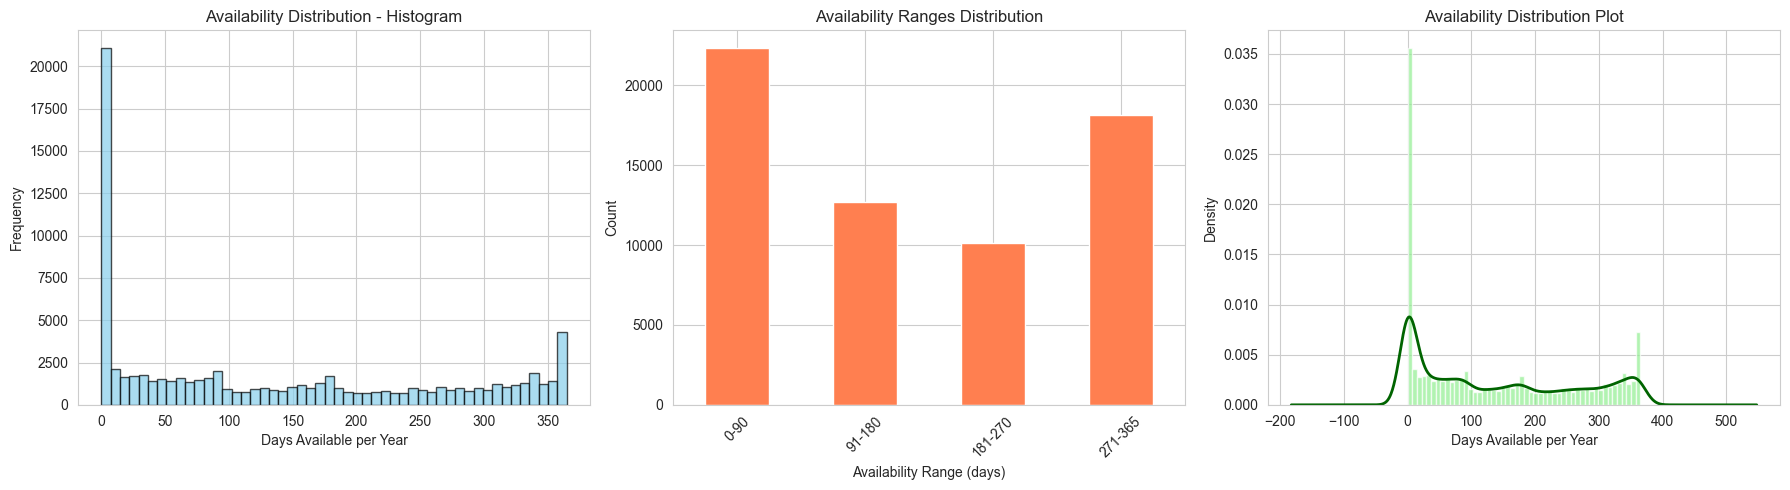

In [288]:
print("\n1.2 BOOKING AVAILABILITY PATTERNS")
print("-"*80)
print(f"\nAvailability Statistics:")
print(f"Mean availability: {df['availability_365'].mean():.2f} days")
print(f"Median availability: {df['availability_365'].median():.2f} days")
print(f"Std deviation: {df['availability_365'].std():.2f} days")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df['availability_365'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Days Available per Year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Availability Distribution - Histogram')

# Count plot for availability ranges
availability_ranges = pd.cut(df['availability_365'], bins=[0, 90, 180, 270, 365],
                              labels=['0-90', '91-180', '181-270', '271-365'])
availability_ranges.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_xlabel('Availability Range (days)')
axes[1].set_ylabel('Count')
axes[1].set_title('Availability Ranges Distribution')
axes[1].tick_params(axis='x', rotation=45)

# Distribution plot
axes[2].hist(df['availability_365'], bins=50, density=True, alpha=0.7, color='lightgreen')
df['availability_365'].plot(kind='kde', ax=axes[2], color='darkgreen', linewidth=2)
axes[2].set_xlabel('Days Available per Year')
axes[2].set_ylabel('Density')
axes[2].set_title('Availability Distribution Plot')

plt.tight_layout()
plt.show()


1.3 REVIEW FREQUENCY DISTRIBUTION
--------------------------------------------------------------------------------

Number of Reviews Statistics:
Mean: 31.95
Median: 11.00

Reviews per Month Statistics:
Mean: 1.39
Median: 0.76


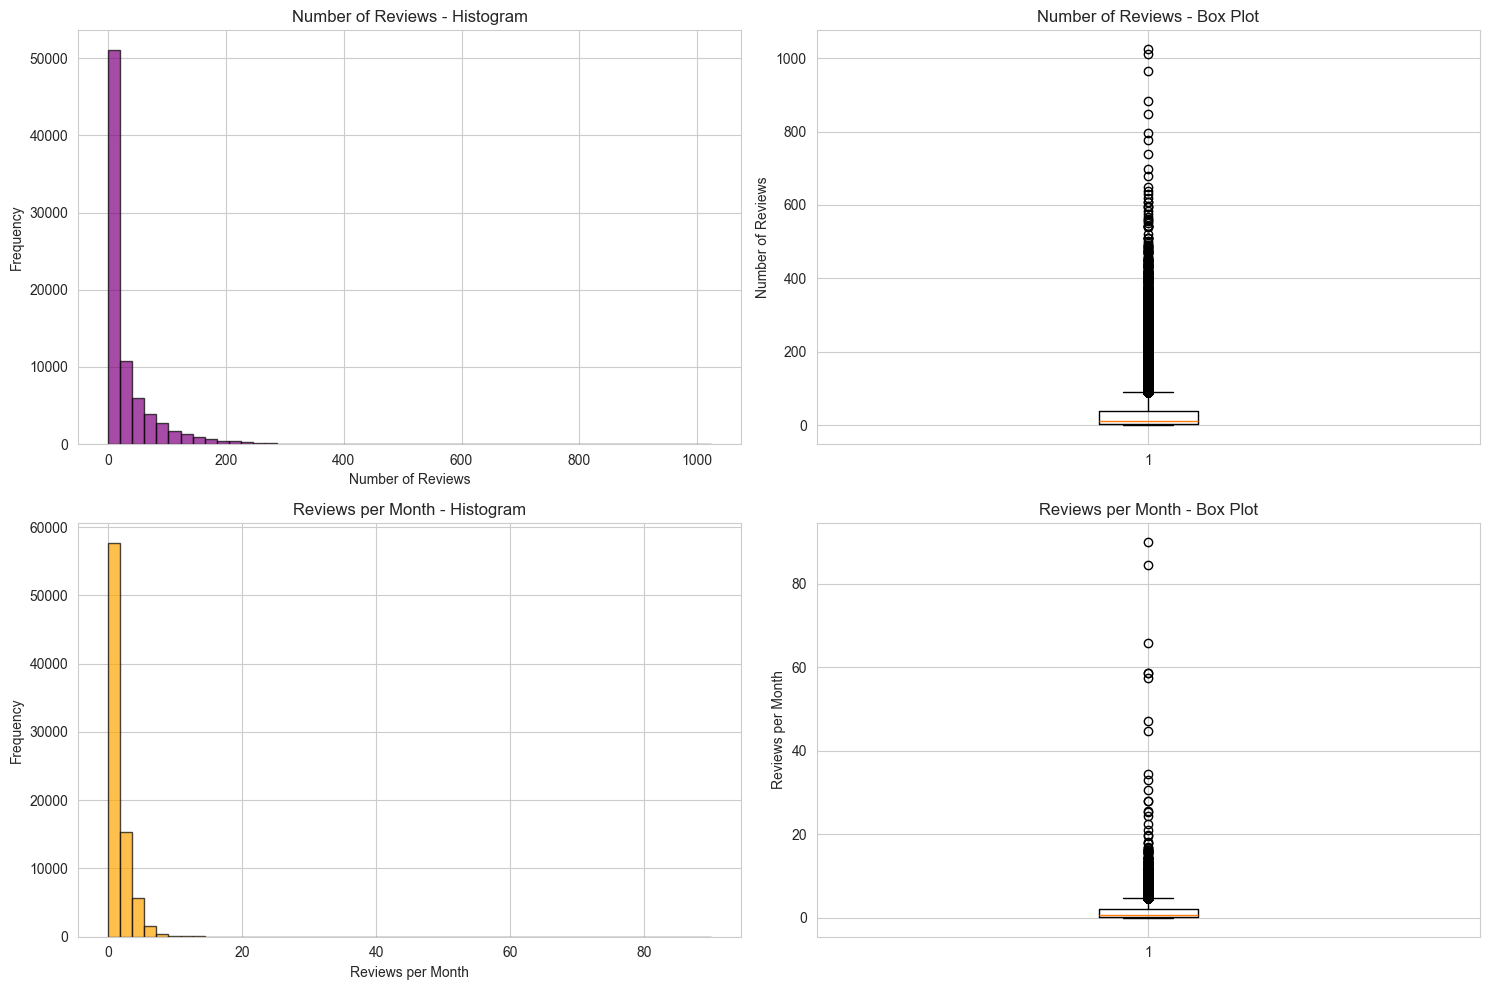

In [284]:
print("\n1.3 REVIEW FREQUENCY DISTRIBUTION")
print("-"*80)
print(f"\nNumber of Reviews Statistics:")
print(f"Mean: {df['number_of_reviews'].mean():.2f}")
print(f"Median: {df['number_of_reviews'].median():.2f}")
print(f"\nReviews per Month Statistics:")
print(f"Mean: {df['reviews_per_month'].mean():.2f}")
print(f"Median: {df['reviews_per_month'].median():.2f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Number of reviews - Histogram
axes[0, 0].hist(df['number_of_reviews'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[0, 0].set_xlabel('Number of Reviews')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Number of Reviews - Histogram')

# Number of reviews - Box plot
axes[0, 1].boxplot(df['number_of_reviews'].dropna())
axes[0, 1].set_ylabel('Number of Reviews')
axes[0, 1].set_title('Number of Reviews - Box Plot')

# Reviews per month - Histogram
axes[1, 0].hist(df['reviews_per_month'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Reviews per Month')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Reviews per Month - Histogram')

# Reviews per month - Box plot
axes[1, 1].boxplot(df['reviews_per_month'].dropna())
axes[1, 1].set_ylabel('Reviews per Month')
axes[1, 1].set_title('Reviews per Month - Box Plot')

plt.tight_layout()
plt.show()


1.4 LISTING AGE ANALYSIS
--------------------------------------------------------------------------------

Construction Year Statistics:
Earliest: 2003
Latest: 2022
Mean: 2012


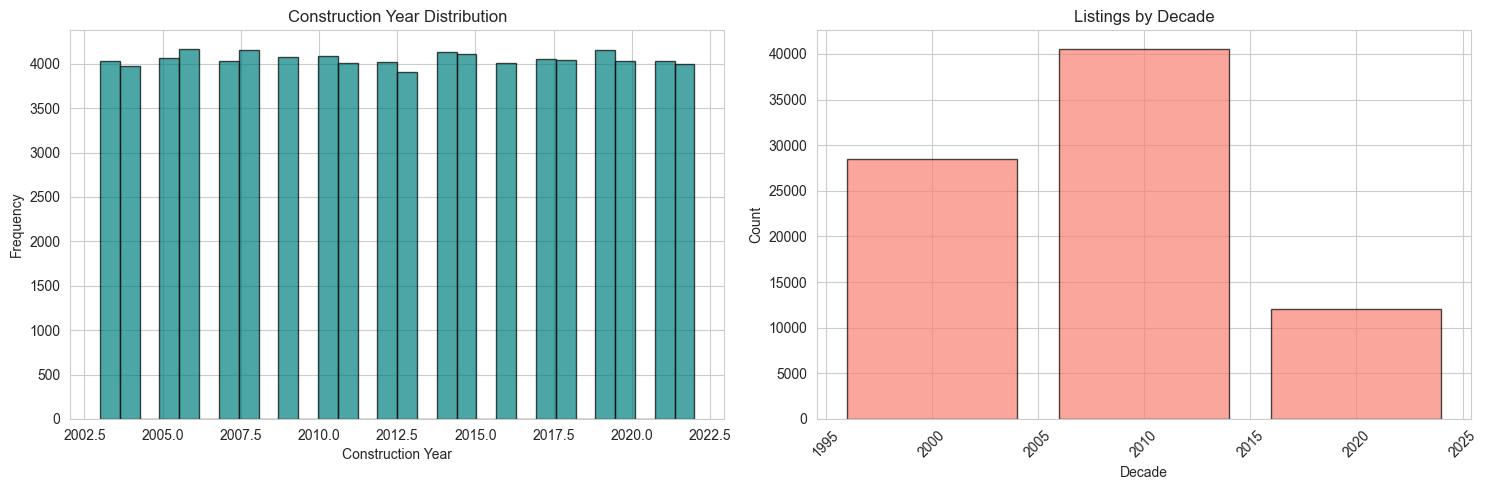

In [285]:
print("\n1.4 LISTING AGE ANALYSIS")
print("-"*80)
print(f"\nConstruction Year Statistics:")
print(f"Earliest: {df['construction_year'].min()}")
print(f"Latest: {df['construction_year'].max()}")
print(f"Mean: {df['construction_year'].mean():.0f}")

# Create decade categories
df['decade'] = (df['construction_year'] // 10) * 10

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['construction_year'], bins=30, edgecolor='black', alpha=0.7, color='teal')
axes[0].set_xlabel('Construction Year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Construction Year Distribution')

# Bar chart by decade
decade_counts = df['decade'].value_counts().sort_index()
axes[1].bar(decade_counts.index, decade_counts.values, width=8, edgecolor='black', alpha=0.7, color='salmon')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Count')
axes[1].set_title('Listings by Decade')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


1.5 HOST PORTFOLIO SIZE
--------------------------------------------------------------------------------

Host Listings Count Statistics:
Mean: 7.12
Median: 1.00
Max: 332


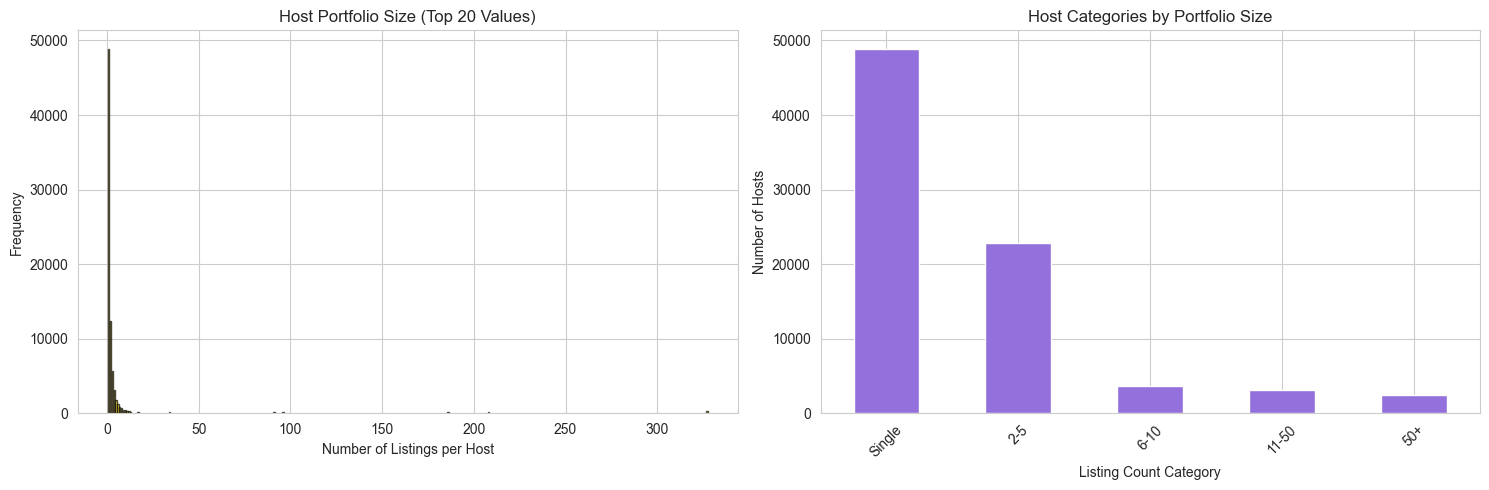

In [ ]:
print("\n1.5 HOST PORTFOLIO SIZE")
print("-"*80)
print(f"\nHost Listings Count Statistics:")
print(f"Mean: {df['calculated_host_listings_count'].mean():.2f}")
print(f"Median: {df['calculated_host_listings_count'].median():.2f}")
print(f"Max: {df['calculated_host_listings_count'].max()}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot (limited to reasonable range for visibility)
host_counts = df['calculated_host_listings_count'].value_counts().head(20).sort_index()
axes[0].bar(host_counts.index, host_counts.values, edgecolor='black', alpha=0.7, color='gold')
axes[0].set_xlabel('Number of Listings per Host')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Host Portfolio Size (Top 20 Values)')

# Bar chart with frequency categories
listing_categories = pd.cut(df['calculated_host_listings_count'],
                            bins=[0, 1, 5, 10, 50, float('inf')],
                            labels=['Single', '2-5', '6-10', '11-50', '50+'])
listing_categories.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='mediumpurple')
axes[1].set_xlabel('Listing Count Category')
axes[1].set_ylabel('Number of Hosts')
axes[1].set_title('Host Categories by Portfolio Size')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


1.6 MINIMUM NIGHTS REQUIREMENT
--------------------------------------------------------------------------------

Minimum Nights Statistics:
Mean: 7.20
Median: 3.00
Mode: 2


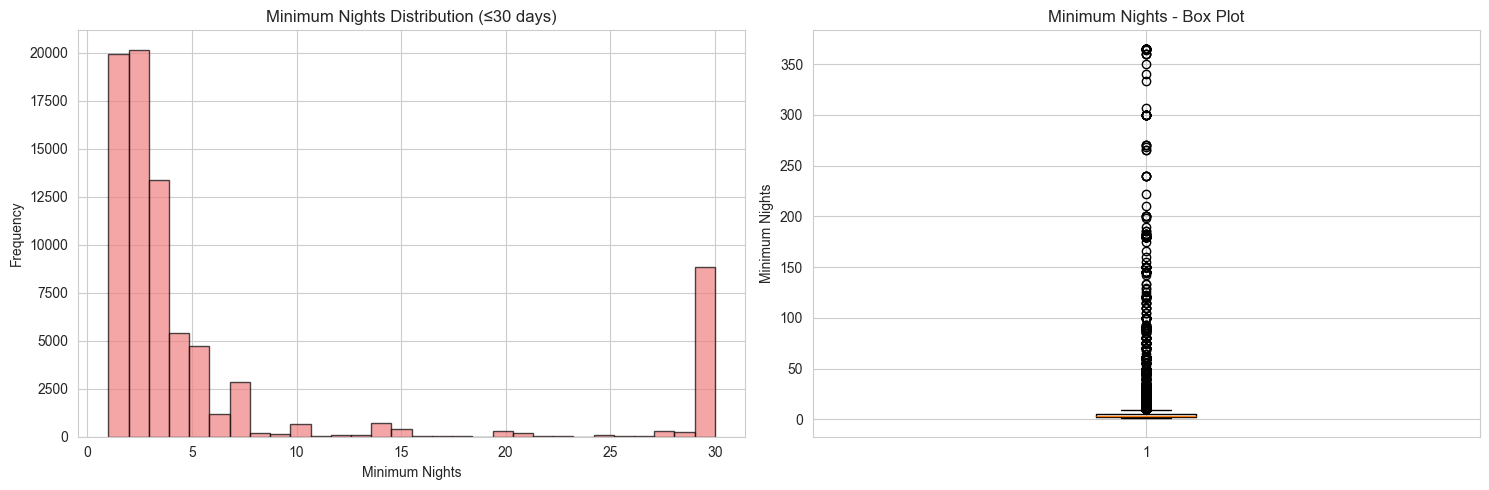

In [287]:
print("\n1.6 MINIMUM NIGHTS REQUIREMENT")
print("-"*80)
print(f"\nMinimum Nights Statistics:")
print(f"Mean: {df['minimum_nights'].mean():.2f}")
print(f"Median: {df['minimum_nights'].median():.2f}")
print(f"Mode: {df['minimum_nights'].mode()[0]}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram (limited range for visibility)
min_nights_filtered = df[df['minimum_nights'] <= 30]
axes[0].hist(min_nights_filtered['minimum_nights'], bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0].set_xlabel('Minimum Nights')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Minimum Nights Distribution (≤30 days)')

# Box plot
axes[1].boxplot(df['minimum_nights'].dropna())
axes[1].set_ylabel('Minimum Nights')
axes[1].set_title('Minimum Nights - Box Plot')

plt.tight_layout()
plt.show()

##### Bivariate Analysis


2.1 PRICE VS LOCATION ANALYSIS
--------------------------------------------------------------------------------


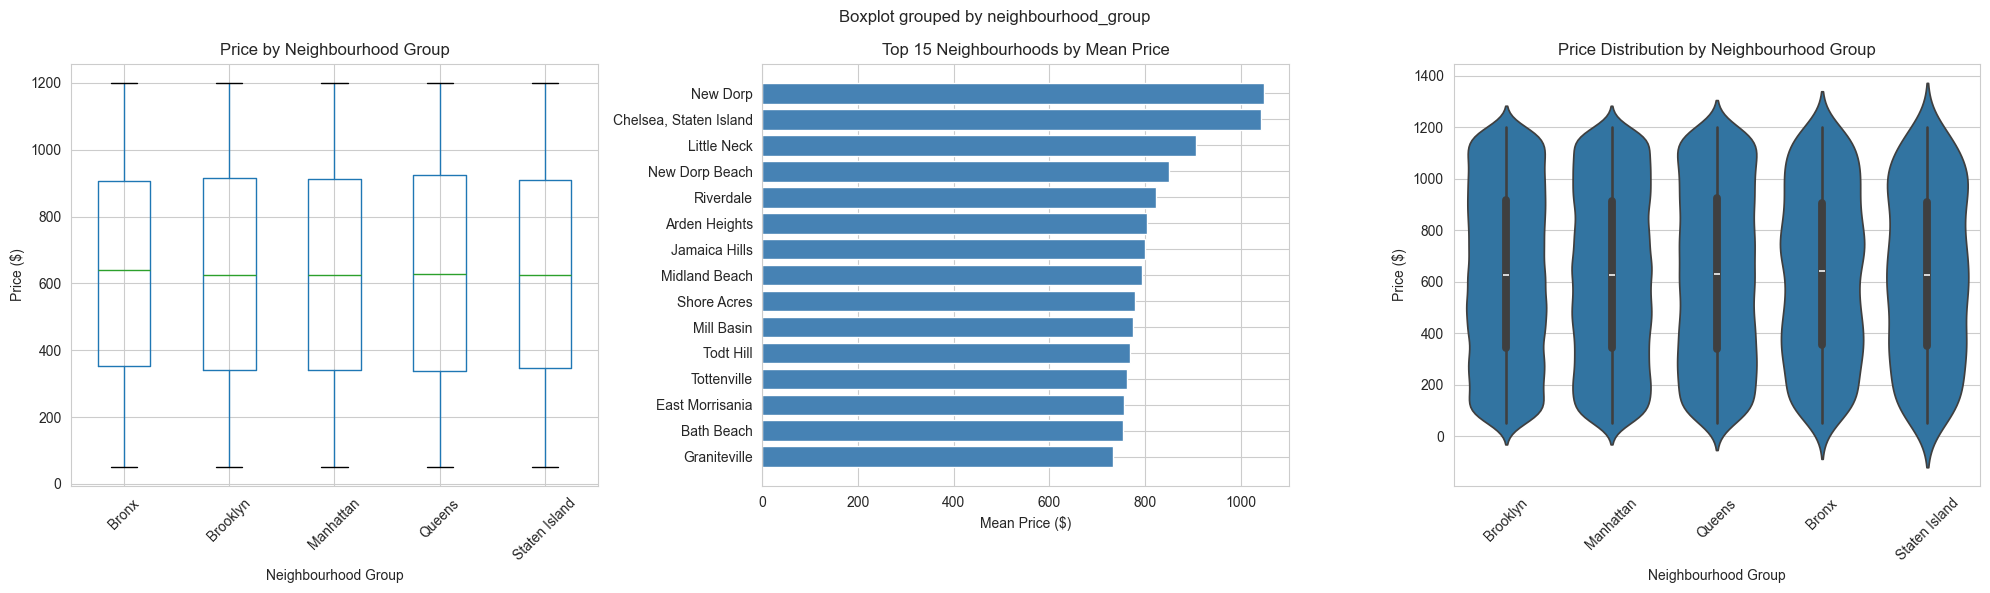

In [290]:
print("\n2.1 PRICE VS LOCATION ANALYSIS")
print("-"*80)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Box plot by neighbourhood_group
if 'neighbourhood_group' in df.columns:
    df.boxplot(column='price', by='neighbourhood_group', ax=axes[0])
    axes[0].set_xlabel('Neighbourhood Group')
    axes[0].set_ylabel('Price ($)')
    axes[0].set_title('Price by Neighbourhood Group')
    plt.sca(axes[0])
    plt.xticks(rotation=45)

# Mean prices by neighbourhood (top 15)
top_neighbourhoods = df.groupby('neighbourhood')['price'].mean().nlargest(15).sort_values(ascending=True)
axes[1].barh(range(len(top_neighbourhoods)), top_neighbourhoods.values, color='steelblue')
axes[1].set_yticks(range(len(top_neighbourhoods)))
axes[1].set_yticklabels(top_neighbourhoods.index)
axes[1].set_xlabel('Mean Price ($)')
axes[1].set_title('Top 15 Neighbourhoods by Mean Price')

# Violin plot by neighbourhood_group
if 'neighbourhood_group' in df.columns:
    sns.violinplot(data=df, x='neighbourhood_group', y='price', ax=axes[2])
    axes[2].set_xlabel('Neighbourhood Group')
    axes[2].set_ylabel('Price ($)')
    axes[2].set_title('Price Distribution by Neighbourhood Group')
    axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


2.2 ROOM TYPE PRICING STRATEGY
--------------------------------------------------------------------------------

Mean Price by Room Type:
                       mean  median         std
room_type                                      
Entire home/apt  625.694267   625.0  331.561089
Hotel room       657.953704   630.5  312.599424
Private room     627.568526   626.0  331.767417
Shared room      629.743955   656.0  337.343565


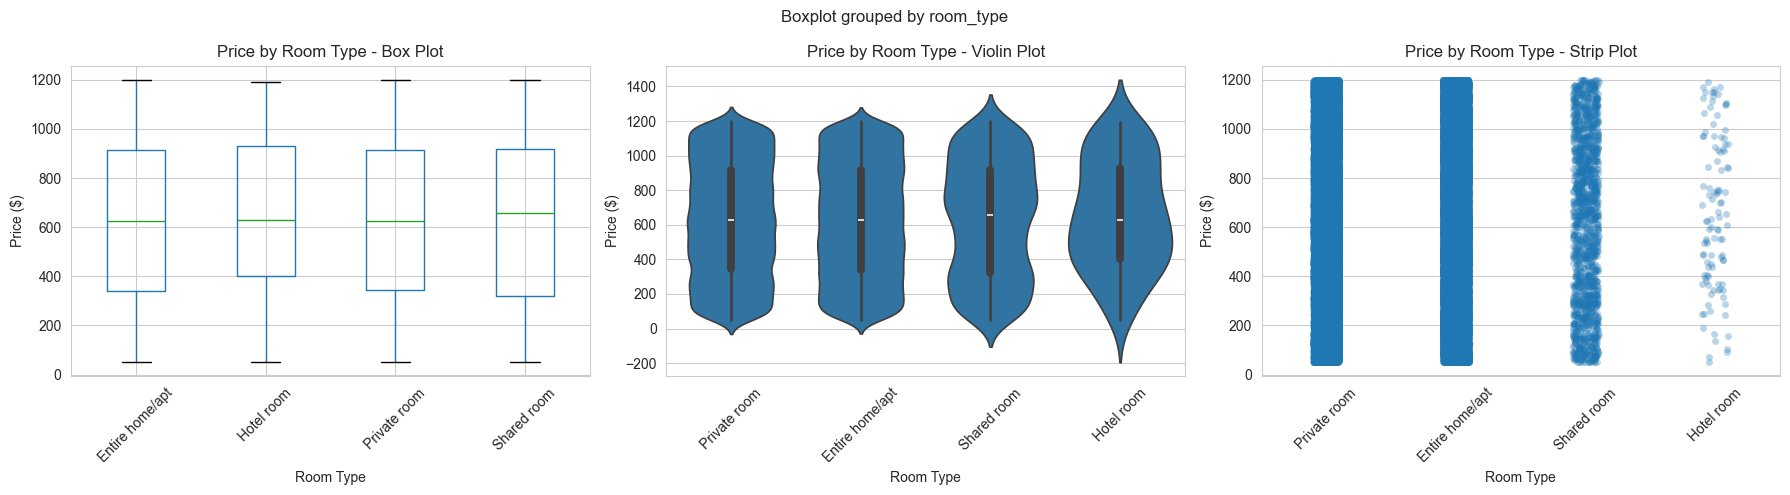

In [291]:
print("\n2.2 ROOM TYPE PRICING STRATEGY")
print("-"*80)
print("\nMean Price by Room Type:")
print(df.groupby('room_type')['price'].agg(['mean', 'median', 'std']))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Box plot
df.boxplot(column='price', by='room_type', ax=axes[0])
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Price by Room Type - Box Plot')
plt.sca(axes[0])
plt.xticks(rotation=45)

# Violin plot
sns.violinplot(data=df, x='room_type', y='price', ax=axes[1])
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Price ($)')
axes[1].set_title('Price by Room Type - Violin Plot')
axes[1].tick_params(axis='x', rotation=45)

# Strip plot
sns.stripplot(data=df, x='room_type', y='price', alpha=0.3, ax=axes[2])
axes[2].set_xlabel('Room Type')
axes[2].set_ylabel('Price ($)')
axes[2].set_title('Price by Room Type - Strip Plot')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


2.3 VERIFICATION IMPACT ON REVIEWS
--------------------------------------------------------------------------------

Verified hosts - Mean reviews: 31.95
Unverified hosts - Mean reviews: nan

Mann-Whitney U test:
Statistic: nan
P-value: nan
Significant difference: No


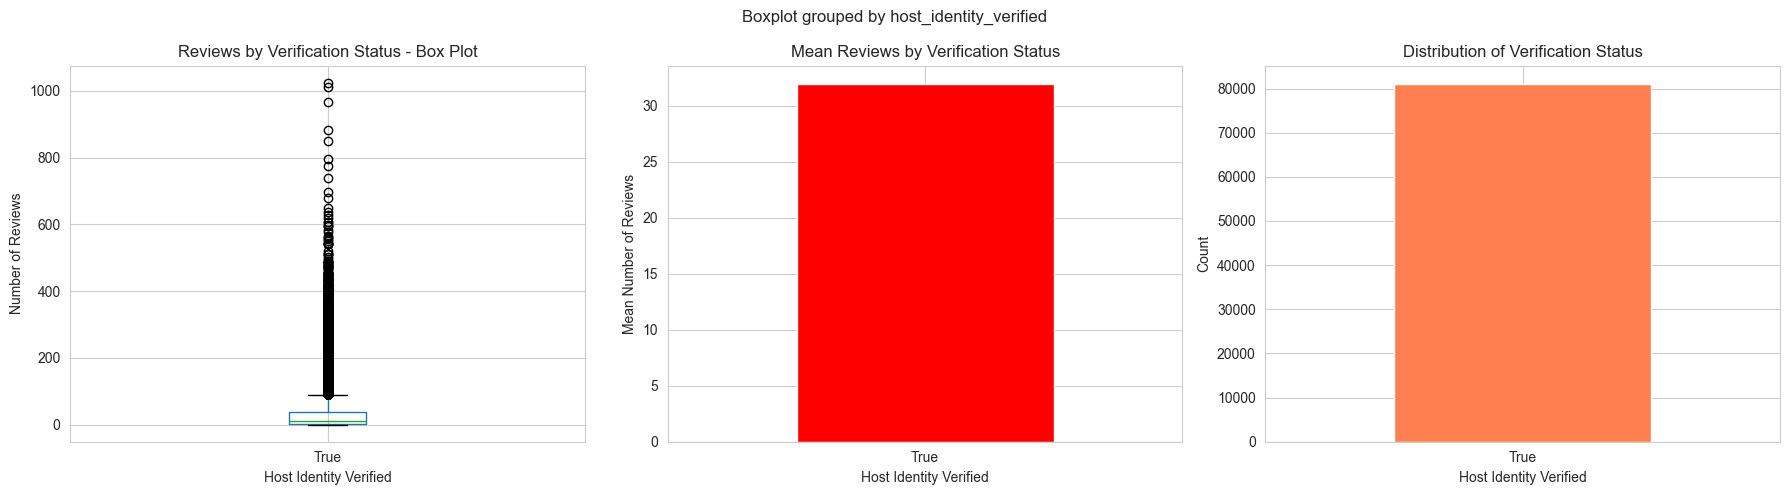

In [292]:
print("\n2.3 VERIFICATION IMPACT ON REVIEWS")
print("-"*80)

verified_reviews = df[df['host_identity_verified'] == True]['number_of_reviews']
unverified_reviews = df[df['host_identity_verified'] == False]['number_of_reviews']

print(f"\nVerified hosts - Mean reviews: {verified_reviews.mean():.2f}")
print(f"Unverified hosts - Mean reviews: {unverified_reviews.mean():.2f}")

# Mann-Whitney U test
stat, p_value = mannwhitneyu(verified_reviews.dropna(), unverified_reviews.dropna(), alternative='two-sided')
print(f"\nMann-Whitney U test:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Box plot
df.boxplot(column='number_of_reviews', by='host_identity_verified', ax=axes[0])
axes[0].set_xlabel('Host Identity Verified')
axes[0].set_ylabel('Number of Reviews')
axes[0].set_title('Reviews by Verification Status - Box Plot')

# Bar chart
df.groupby('host_identity_verified')['number_of_reviews'].mean().plot(kind='bar', ax=axes[1], color=['red', 'green'])
axes[1].set_xlabel('Host Identity Verified')
axes[1].set_ylabel('Mean Number of Reviews')
axes[1].set_title('Mean Reviews by Verification Status')
axes[1].tick_params(axis='x', rotation=0)

# Count plot
df['host_identity_verified'].value_counts().plot(kind='bar', ax=axes[2], color=['coral', 'lightblue'])
axes[2].set_xlabel('Host Identity Verified')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Verification Status')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


2.4 INSTANT BOOKING VS PRICING
--------------------------------------------------------------------------------

Instant bookable - Mean price: $626.36
Non-instant bookable - Mean price: $626.96

Independent t-test:
Statistic: -0.2559
P-value: 0.7981
Significant difference: No


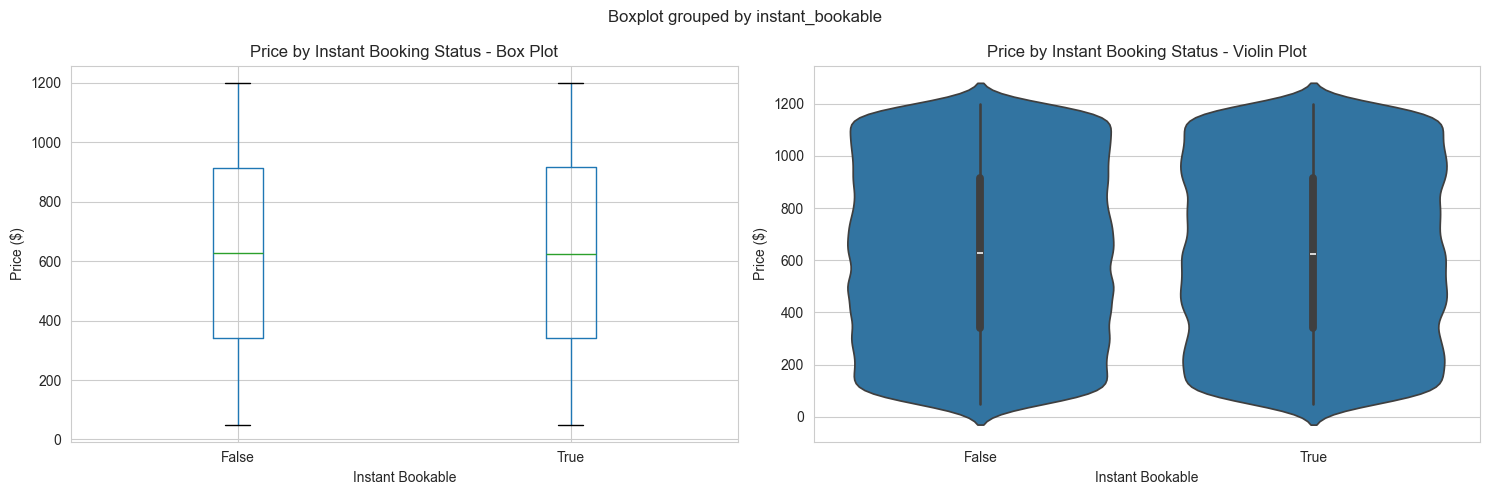

In [293]:
print("\n2.4 INSTANT BOOKING VS PRICING")
print("-"*80)

instant_prices = df[df['instant_bookable'] == True]['price']
non_instant_prices = df[df['instant_bookable'] == False]['price']

print(f"\nInstant bookable - Mean price: ${instant_prices.mean():.2f}")
print(f"Non-instant bookable - Mean price: ${non_instant_prices.mean():.2f}")

# Independent t-test
stat, p_value = stats.ttest_ind(instant_prices.dropna(), non_instant_prices.dropna())
print(f"\nIndependent t-test:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot
df.boxplot(column='price', by='instant_bookable', ax=axes[0])
axes[0].set_xlabel('Instant Bookable')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Price by Instant Booking Status - Box Plot')

# Violin plot
sns.violinplot(data=df, x='instant_bookable', y='price', ax=axes[1])
axes[1].set_xlabel('Instant Bookable')
axes[1].set_ylabel('Price ($)')
axes[1].set_title('Price by Instant Booking Status - Violin Plot')

plt.tight_layout()
plt.show()


2.5 CANCELLATION POLICY IMPACT
--------------------------------------------------------------------------------

Mean Price by Cancellation Policy:
                           mean  median  count
cancellation_policy                           
flexible             628.315912   629.0  26979
moderate             625.817160   621.0  27133
strict               625.860163   627.0  27010


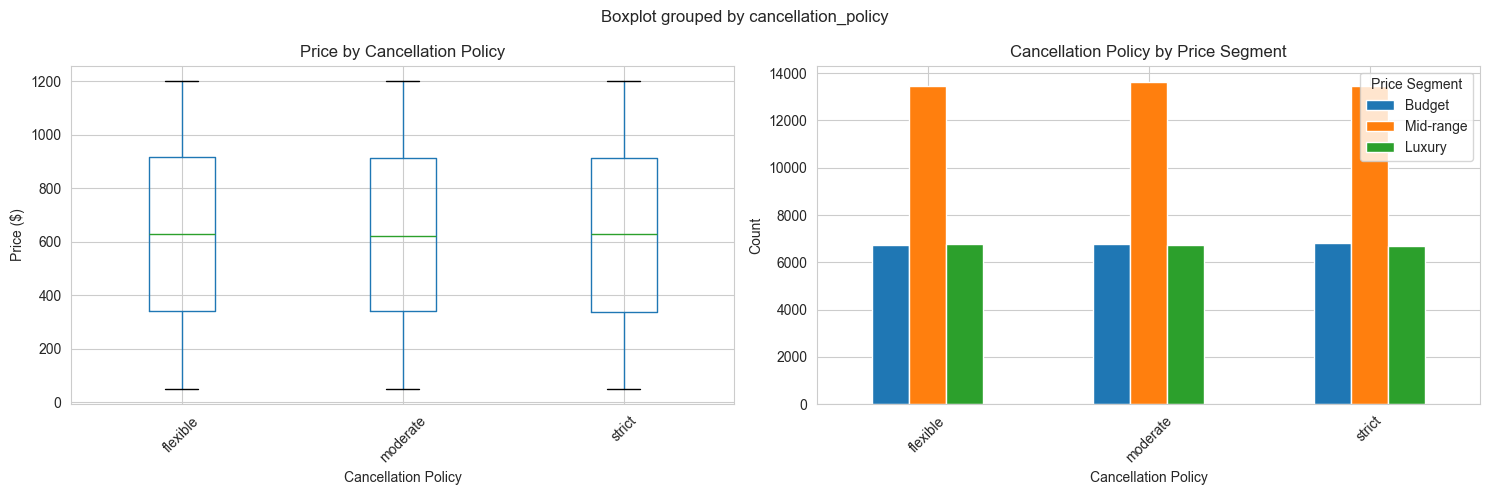

In [294]:
print("\n2.5 CANCELLATION POLICY IMPACT")
print("-"*80)
print("\nMean Price by Cancellation Policy:")
print(df.groupby('cancellation_policy')['price'].agg(['mean', 'median', 'count']))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot
df.boxplot(column='price', by='cancellation_policy', ax=axes[0])
axes[0].set_xlabel('Cancellation Policy')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Price by Cancellation Policy')
plt.sca(axes[0])
plt.xticks(rotation=45)

# Grouped bar chart
policy_price_ranges = df.groupby(['cancellation_policy', 'price_segment']).size().unstack(fill_value=0)
policy_price_ranges.plot(kind='bar', ax=axes[1], stacked=False)
axes[1].set_xlabel('Cancellation Policy')
axes[1].set_ylabel('Count')
axes[1].set_title('Cancellation Policy by Price Segment')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Price Segment')

plt.tight_layout()
plt.show()


2.6 SERVICE FEE RELATIONSHIP WITH PRICE
--------------------------------------------------------------------------------

Mean service fee percentage: 20.00%
Median service fee percentage: 20.00%

Pearson Correlation: 1.0000 (p-value: 0.0000)
Spearman Correlation: 1.0000 (p-value: 0.0000)


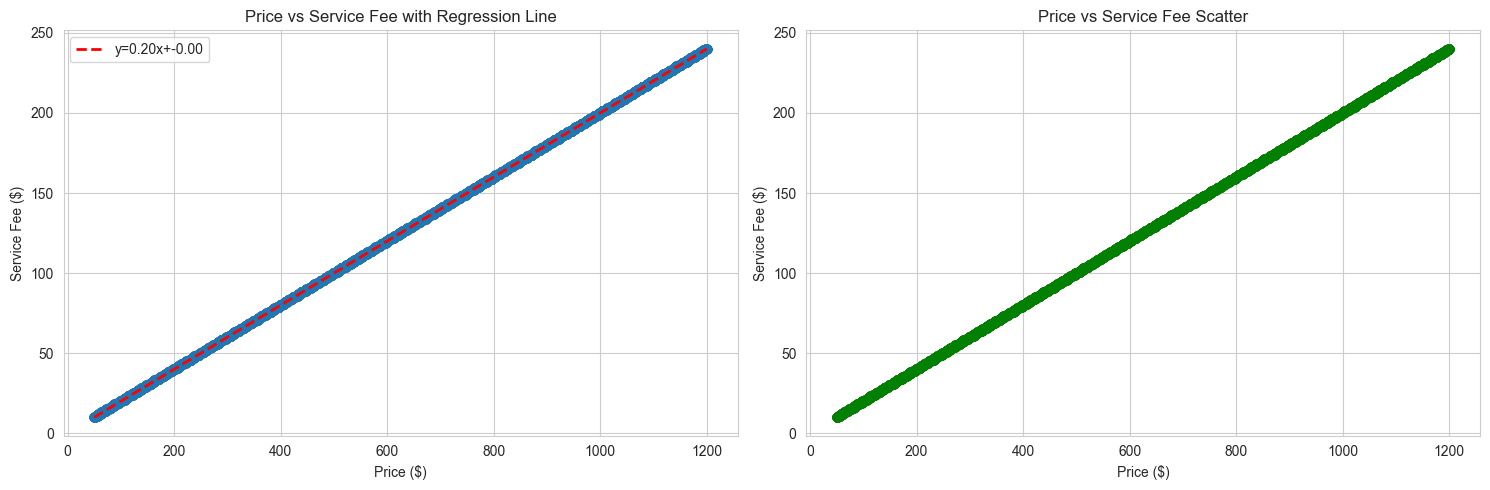

In [295]:
print("\n2.6 SERVICE FEE RELATIONSHIP WITH PRICE")
print("-"*80)

# Calculate service fee percentage
df['service_fee_pct'] = (df['service_fee'] / df['price']) * 100
print(f"\nMean service fee percentage: {df['service_fee_pct'].mean():.2f}%")
print(f"Median service fee percentage: {df['service_fee_pct'].median():.2f}%")

# Correlation
corr_pearson, p_pearson = pearsonr(df['price'].dropna(), df['service_fee'].dropna())
corr_spearman, p_spearman = spearmanr(df['price'].dropna(), df['service_fee'].dropna())

print(f"\nPearson Correlation: {corr_pearson:.4f} (p-value: {p_pearson:.4f})")
print(f"Spearman Correlation: {corr_spearman:.4f} (p-value: {p_spearman:.4f})")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot with regression line
axes[0].scatter(df['price'], df['service_fee'], alpha=0.3)
z = np.polyfit(df['price'].dropna(), df['service_fee'].dropna(), 1)
p = np.poly1d(z)
axes[0].plot(df['price'].sort_values(), p(df['price'].sort_values()), "r--", linewidth=2,
             label=f'y={z[0]:.2f}x+{z[1]:.2f}')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Service Fee ($)')
axes[0].set_title('Price vs Service Fee with Regression Line')
axes[0].legend()

# Joint plot alternative using scatter + histograms
axes[1].scatter(df['price'], df['service_fee'], alpha=0.3, color='green')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Service Fee ($)')
axes[1].set_title('Price vs Service Fee Scatter')

plt.tight_layout()
plt.show()


2.7 REVIEWS VS AVAILABILITY
--------------------------------------------------------------------------------

Pearson Correlation: 0.1070
P-value: 0.0000
Significant correlation: Yes


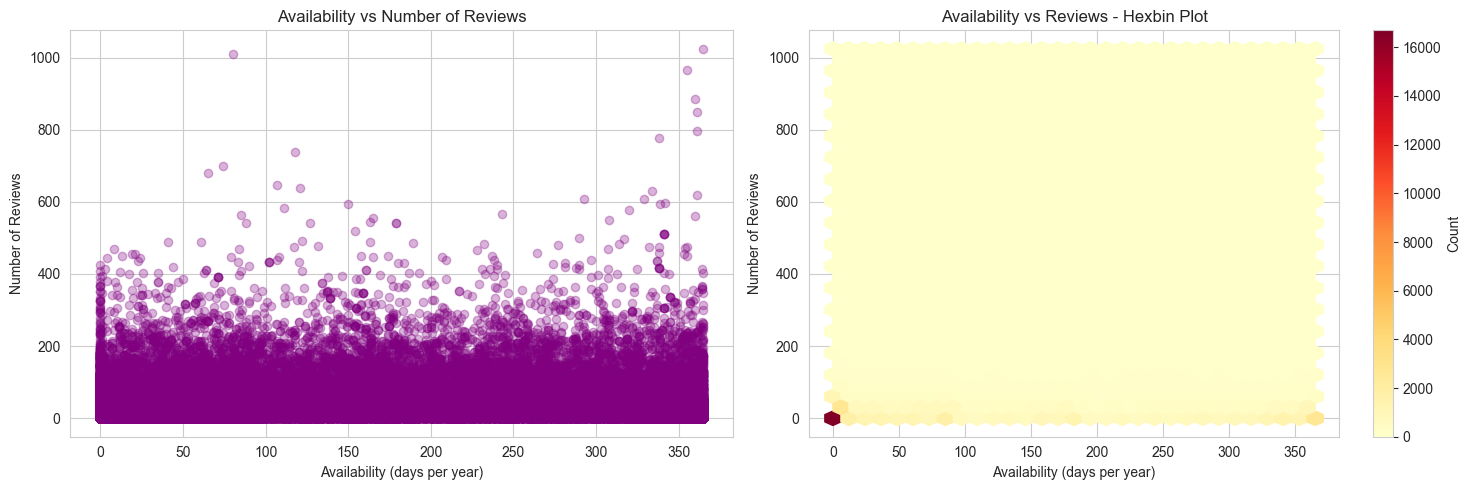

In [296]:
print("\n2.7 REVIEWS VS AVAILABILITY")
print("-"*80)

corr, p_value = pearsonr(df['availability_365'].dropna(), df['number_of_reviews'].dropna())
print(f"\nPearson Correlation: {corr:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significant correlation: {'Yes' if p_value < 0.05 else 'No'}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(df['availability_365'], df['number_of_reviews'], alpha=0.3, color='purple')
axes[0].set_xlabel('Availability (days per year)')
axes[0].set_ylabel('Number of Reviews')
axes[0].set_title('Availability vs Number of Reviews')

# Hexbin plot
hexbin = axes[1].hexbin(df['availability_365'], df['number_of_reviews'], gridsize=30, cmap='YlOrRd')
axes[1].set_xlabel('Availability (days per year)')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_title('Availability vs Reviews - Hexbin Plot')
plt.colorbar(hexbin, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()


2.8 PROPERTY AGE VS PRICE
--------------------------------------------------------------------------------

Pearson Correlation: -0.0050
P-value: 0.1537


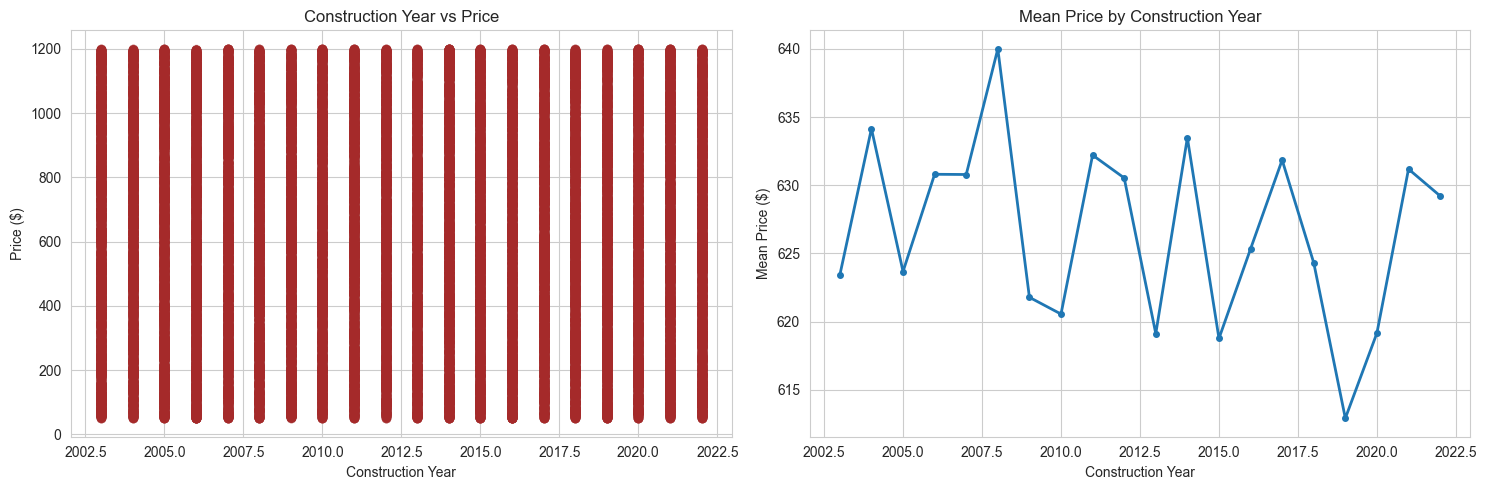

In [297]:
print("\n2.8 PROPERTY AGE VS PRICE")
print("-"*80)

corr, p_value = pearsonr(df['construction_year'].dropna(), df['price'].dropna())
print(f"\nPearson Correlation: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(df['construction_year'], df['price'], alpha=0.3, color='brown')
axes[0].set_xlabel('Construction Year')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Construction Year vs Price')

# Line plot with moving average
year_price = df.groupby('construction_year')['price'].mean().sort_index()
axes[1].plot(year_price.index, year_price.values, marker='o', linewidth=2, markersize=4)
axes[1].set_xlabel('Construction Year')
axes[1].set_ylabel('Mean Price ($)')
axes[1].set_title('Mean Price by Construction Year')

plt.tight_layout()
plt.show()



2.9 MINIMUM NIGHTS VS REVIEWS
--------------------------------------------------------------------------------

Pearson Correlation (min_nights ≤ 30): -0.1127
P-value: 0.0000


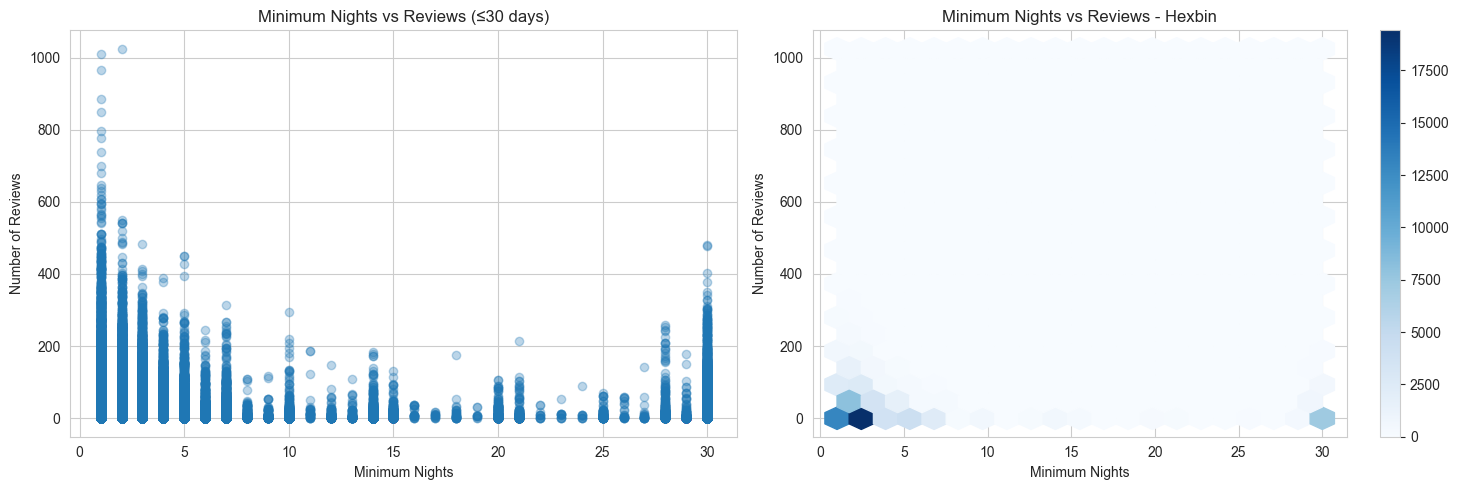

In [ ]:
print("\n2.9 MINIMUM NIGHTS VS REVIEWS")
print("-"*80)

# Filter extreme outliers for better visualization
filtered_df = df[df['minimum_nights'] <= 30]
corr, p_value = pearsonr(filtered_df['minimum_nights'].dropna(),
                         filtered_df['number_of_reviews'].dropna())
print(f"\nPearson Correlation (min_nights ≤ 30): {corr:.4f}")
print(f"P-value: {p_value:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(filtered_df['minimum_nights'], filtered_df['number_of_reviews'], alpha=0.3)
axes[0].set_xlabel('Minimum Nights')
axes[0].set_ylabel('Number of Reviews')
axes[0].set_title('Minimum Nights vs Reviews (≤30 days)')

# Hexbin plot
hexbin = axes[1].hexbin(filtered_df['minimum_nights'], filtered_df['number_of_reviews'],
                        gridsize=20, cmap='Blues')
axes[1].set_xlabel('Minimum Nights')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_title('Minimum Nights vs Reviews - Hexbin')
plt.colorbar(hexbin, ax=axes[1])

plt.tight_layout()
plt.show()


2.10 HOST LISTING COUNT VS PERFORMANCE
--------------------------------------------------------------------------------

Mean Review Rate by Host Category:
host_category
Single-listing        3.246948
Small (2-5)           3.312495
Multi-listing (6+)    3.374074
Name: review_rate_number, dtype: float64


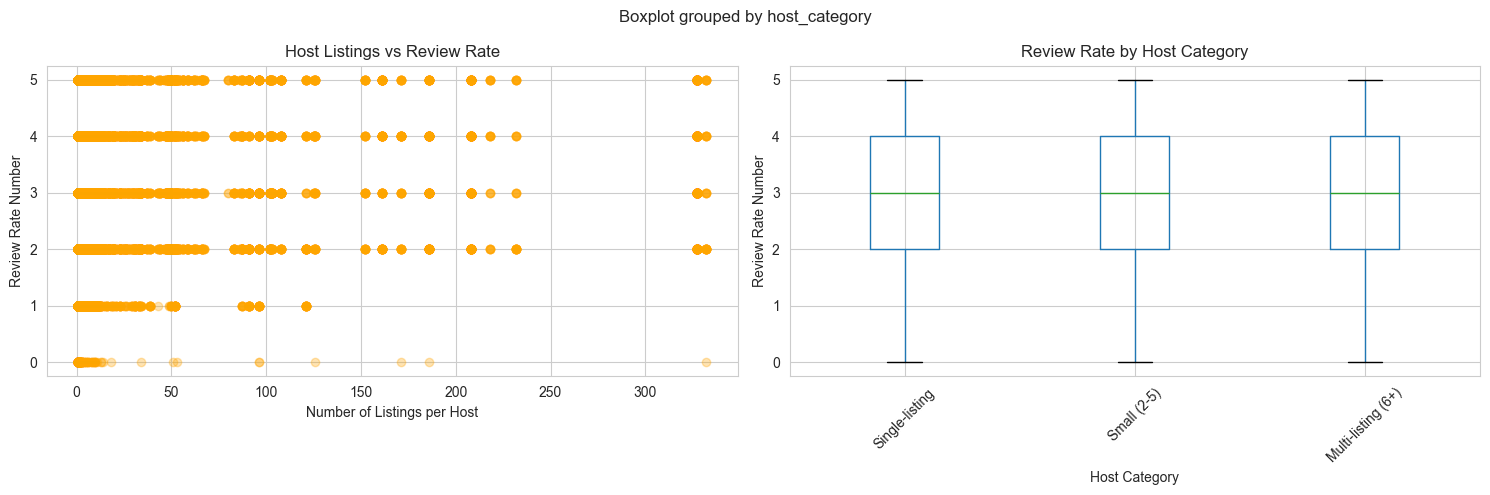

In [299]:
print("\n2.10 HOST LISTING COUNT VS PERFORMANCE")
print("-"*80)

# Categorize hosts
df['host_category'] = pd.cut(df['calculated_host_listings_count'],
                              bins=[0, 1, 5, float('inf')],
                              labels=['Single-listing', 'Small (2-5)', 'Multi-listing (6+)'])

print("\nMean Review Rate by Host Category:")
print(df.groupby('host_category')['review_rate_number'].mean())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(df['calculated_host_listings_count'], df['review_rate_number'], alpha=0.3, color='orange')
axes[0].set_xlabel('Number of Listings per Host')
axes[0].set_ylabel('Review Rate Number')
axes[0].set_title('Host Listings vs Review Rate')

# Box plot
df.boxplot(column='review_rate_number', by='host_category', ax=axes[1])
axes[1].set_xlabel('Host Category')
axes[1].set_ylabel('Review Rate Number')
axes[1].set_title('Review Rate by Host Category')
plt.sca(axes[1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Multivariate Analysis


3.1 GEOGRAPHICAL PRICE MAPPING
--------------------------------------------------------------------------------


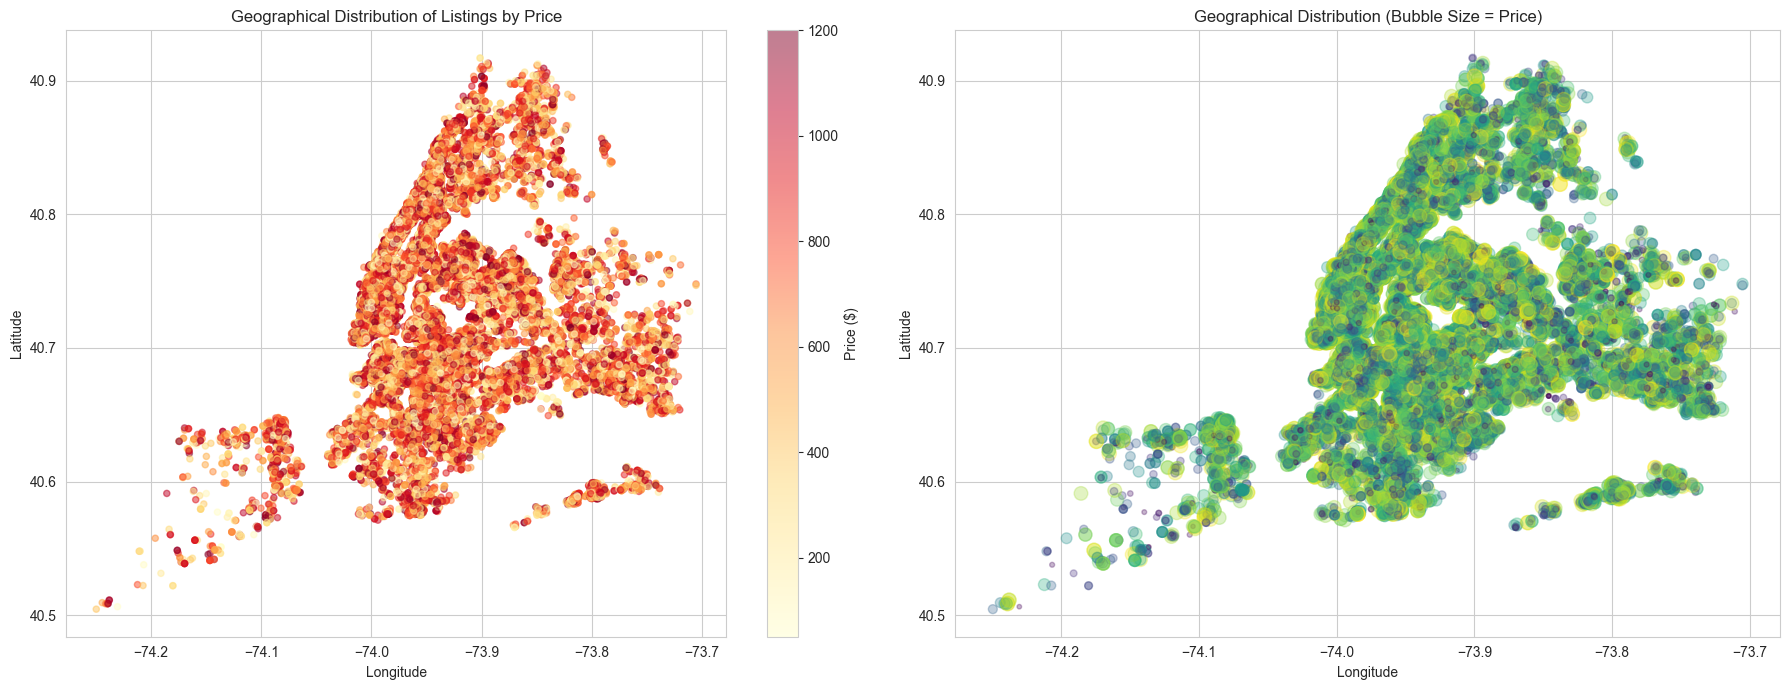

In [300]:
print("\n3.1 GEOGRAPHICAL PRICE MAPPING")
print("-"*80)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Scatter plot colored by price
scatter = axes[0].scatter(df['long'], df['lat'], c=df['price'], cmap='YlOrRd',
                         alpha=0.5, s=20)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Geographical Distribution of Listings by Price')
plt.colorbar(scatter, ax=axes[0], label='Price ($)')

# Bubble chart (size by price)
sizes = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min()) * 100 + 10
axes[1].scatter(df['long'], df['lat'], s=sizes, alpha=0.3, c=df['price'], cmap='viridis')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('Geographical Distribution (Bubble Size = Price)')

plt.tight_layout()
plt.show()


3.2 ROOM TYPE PERFORMANCE BY LOCATION
--------------------------------------------------------------------------------


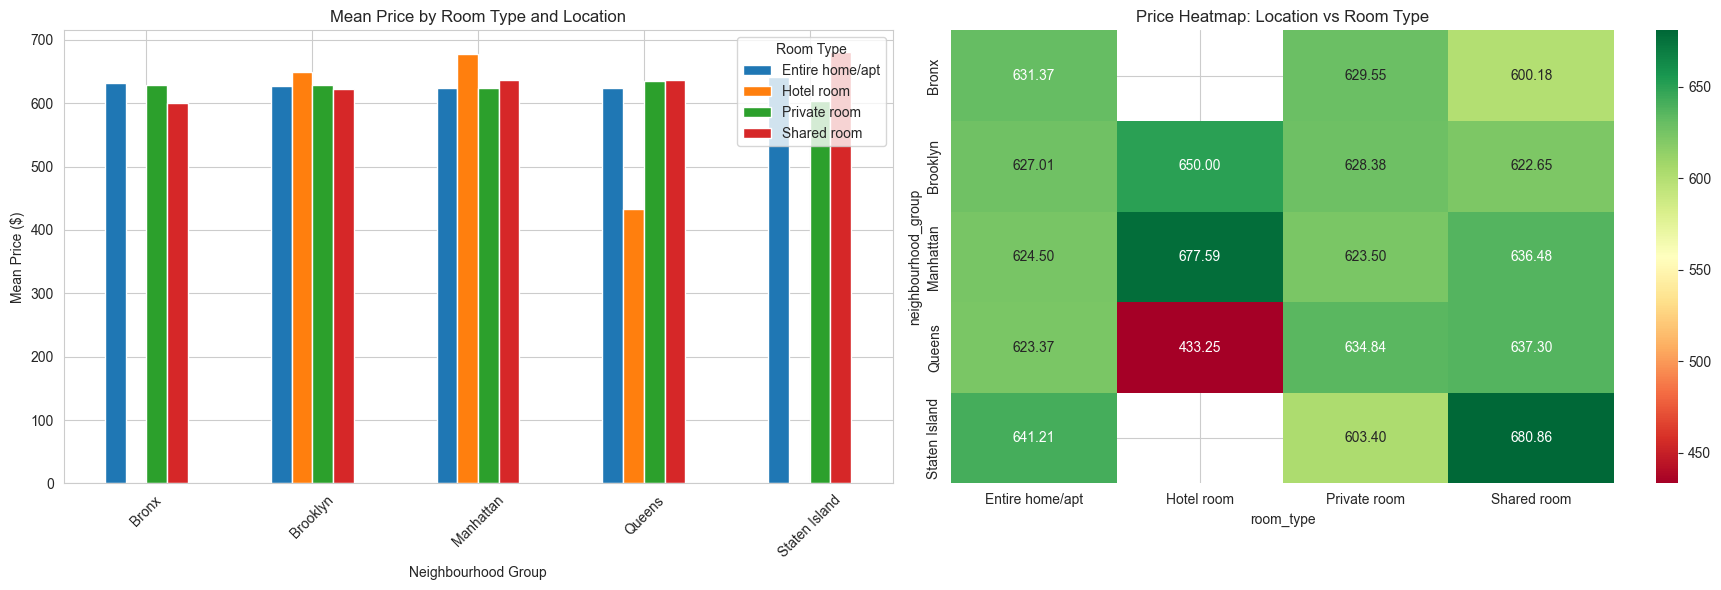

In [ ]:
print("\n3.2 ROOM TYPE PERFORMANCE BY LOCATION")
print("-"*80)

if 'neighbourhood_group' in df.columns:
    # Grouped bar chart
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    room_location_price = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()
    room_location_price.plot(kind='bar', ax=axes[0])
    axes[0].set_xlabel('Neighbourhood Group')
    axes[0].set_ylabel('Mean Price ($)')
    axes[0].set_title('Mean Price by Room Type and Location')
    axes[0].legend(title='Room Type')
    axes[0].tick_params(axis='x', rotation=45)

    # Heatmap
    pivot_table = df.pivot_table(values='price', index='neighbourhood_group',
                                 columns='room_type', aggfunc='mean')
    sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='RdYlGn', ax=axes[1])
    axes[1].set_title('Price Heatmap: Location vs Room Type')

    plt.tight_layout()
    plt.show()



3.3 VERIFICATION, INSTANT BOOKING & PRICING TRIANGLE
--------------------------------------------------------------------------------


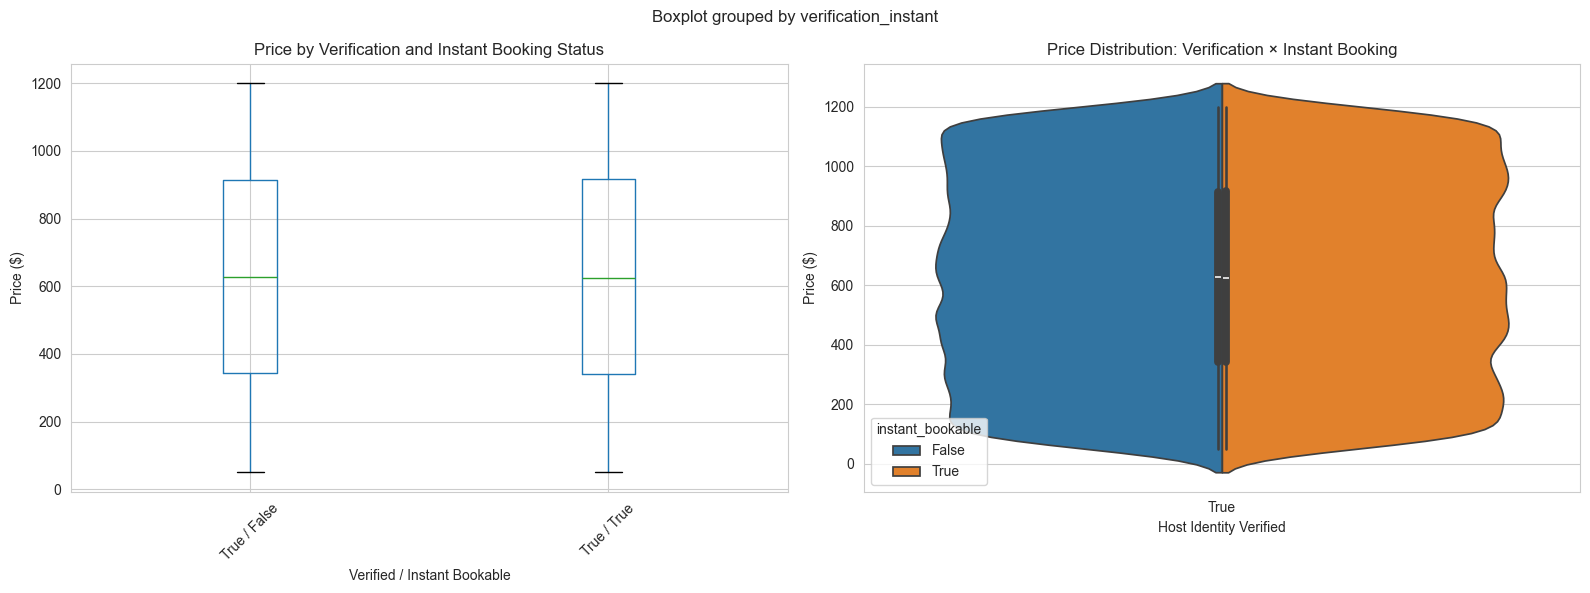

In [ ]:
print("\n3.3 VERIFICATION, INSTANT BOOKING & PRICING TRIANGLE")
print("-"*80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grouped box plot
df['verification_instant'] = df['host_identity_verified'].astype(str) + ' / ' + df['instant_bookable'].astype(str)
df.boxplot(column='price', by='verification_instant', ax=axes[0])
axes[0].set_xlabel('Verified / Instant Bookable')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Price by Verification and Instant Booking Status')
plt.sca(axes[0])
plt.xticks(rotation=45)

# Violin plot with hue
verification_instant_df = df.copy()
sns.violinplot(data=verification_instant_df, x='host_identity_verified',
               y='price', hue='instant_bookable', split=True, ax=axes[1])
axes[1].set_xlabel('Host Identity Verified')
axes[1].set_ylabel('Price ($)')
axes[1].set_title('Price Distribution: Verification × Instant Booking')

plt.tight_layout()
plt.show()

In [314]:
groups = []
for verified in [True, False]:
    for instant in [True, False]:
        group_data = df[
            (df['host_identity_verified'] == verified) &
            (df['instant_bookable'] == instant)
        ]['price'].dropna()
        groups.append(group_data)

groups = [g for g in groups if len(g) > 1 and g.var() > 0]

f_stat, p_value = f_oneway(*groups)
print("\nTwo-way ANOVA-like test (simplified):")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")


Two-way ANOVA-like test (simplified):
F-statistic: 0.0655
P-value: 0.7981



3.4 POLICY-PRICE-REVIEWS RELATIONSHIP
--------------------------------------------------------------------------------


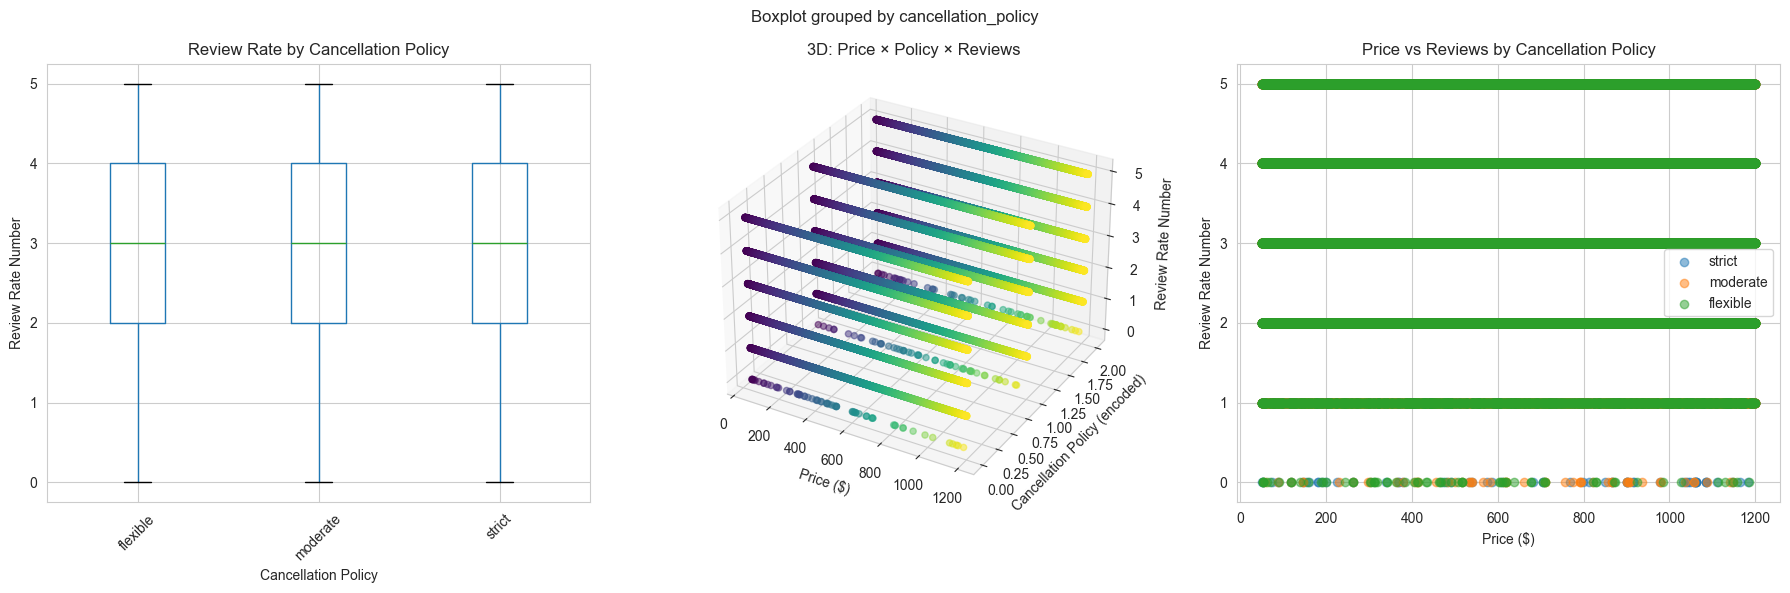

In [315]:
print("\n3.4 POLICY-PRICE-REVIEWS RELATIONSHIP")
print("-"*80)

fig = plt.figure(figsize=(18, 6))

# Create 3 subplots
ax1 = plt.subplot(131)
ax2 = plt.subplot(132, projection='3d')
ax3 = plt.subplot(133)

# Grouped box plot
df.boxplot(column='review_rate_number', by='cancellation_policy', ax=ax1)
ax1.set_xlabel('Cancellation Policy')
ax1.set_ylabel('Review Rate Number')
ax1.set_title('Review Rate by Cancellation Policy')
plt.sca(ax1)
plt.xticks(rotation=45)

# 3D scatter plot
policies_encoded = pd.Categorical(df['cancellation_policy']).codes
ax2.scatter(df['price'], policies_encoded, df['review_rate_number'],
           c=df['price'], cmap='viridis', alpha=0.5)
ax2.set_xlabel('Price ($)')
ax2.set_ylabel('Cancellation Policy (encoded)')
ax2.set_zlabel('Review Rate Number')
ax2.set_title('3D: Price × Policy × Reviews')

# Grouped scatter
for policy in df['cancellation_policy'].unique():
    policy_data = df[df['cancellation_policy'] == policy]
    ax3.scatter(policy_data['price'], policy_data['review_rate_number'],
               label=policy, alpha=0.5)
ax3.set_xlabel('Price ($)')
ax3.set_ylabel('Review Rate Number')
ax3.set_title('Price vs Reviews by Cancellation Policy')
ax3.legend()

plt.tight_layout()
plt.show()


3.5 TEMPORAL-SPATIAL-PRICE ANALYSIS
--------------------------------------------------------------------------------


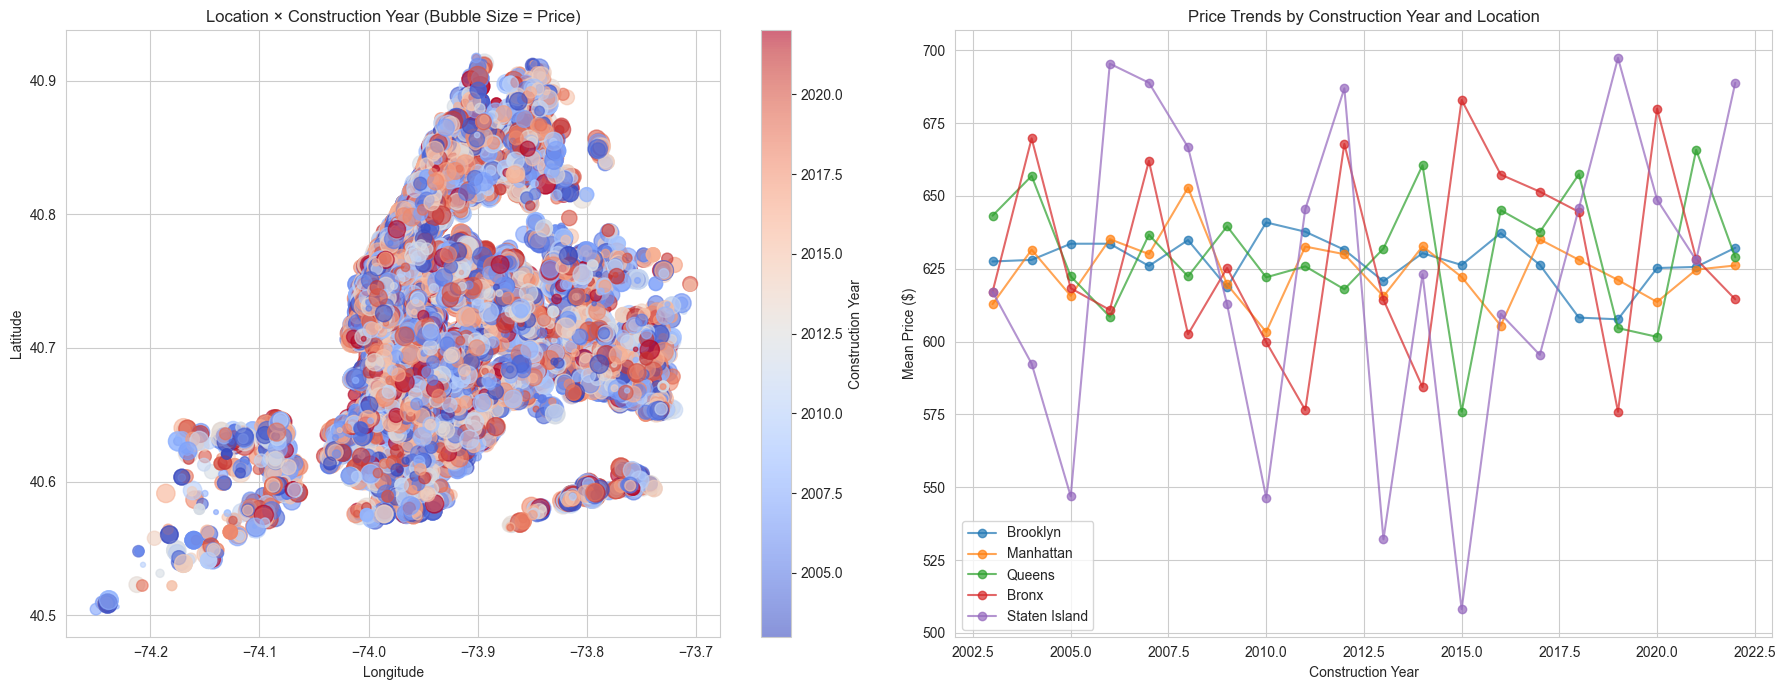

In [316]:
print("\n3.5 TEMPORAL-SPATIAL-PRICE ANALYSIS")
print("-"*80)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Bubble chart with construction year
sizes = (df['price'] / df['price'].max()) * 200
scatter = axes[0].scatter(df['long'], df['lat'], s=sizes, c=df['construction_year'],
                         cmap='coolwarm', alpha=0.6)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Location × Construction Year (Bubble Size = Price)')
plt.colorbar(scatter, ax=axes[0], label='Construction Year')

# Price by construction year and neighbourhood
if 'neighbourhood_group' in df.columns:
    for ng in df['neighbourhood_group'].unique()[:5]:  # Limit to 5 for visibility
        ng_data = df[df['neighbourhood_group'] == ng]
        year_price = ng_data.groupby('construction_year')['price'].mean()
        axes[1].plot(year_price.index, year_price.values, marker='o', label=ng, alpha=0.7)

    axes[1].set_xlabel('Construction Year')
    axes[1].set_ylabel('Mean Price ($)')
    axes[1].set_title('Price Trends by Construction Year and Location')
    axes[1].legend()

plt.tight_layout()
plt.show()


3.6 HOST PERFORMANCE DASHBOARD
--------------------------------------------------------------------------------

Top 10 Hosts by Total Reviews:
           host_id  calculated_host_listings_count   price  number_of_reviews
44286  53558555483                              54   121.0               1024
36574  44069230937                              11  1097.0               1010
19775  23813117370                               4   123.0                966
34006  41031720514                               9   486.0                884
16609  20032806094                              12    89.0                849
64711  78564178478                              12   552.0                797
71847  87332142446                               4    74.0                776
74138  90212124971                              11   257.0                738
10542  12571850348                               1  1147.0                698
16480  19892961158                               1   847.0                6

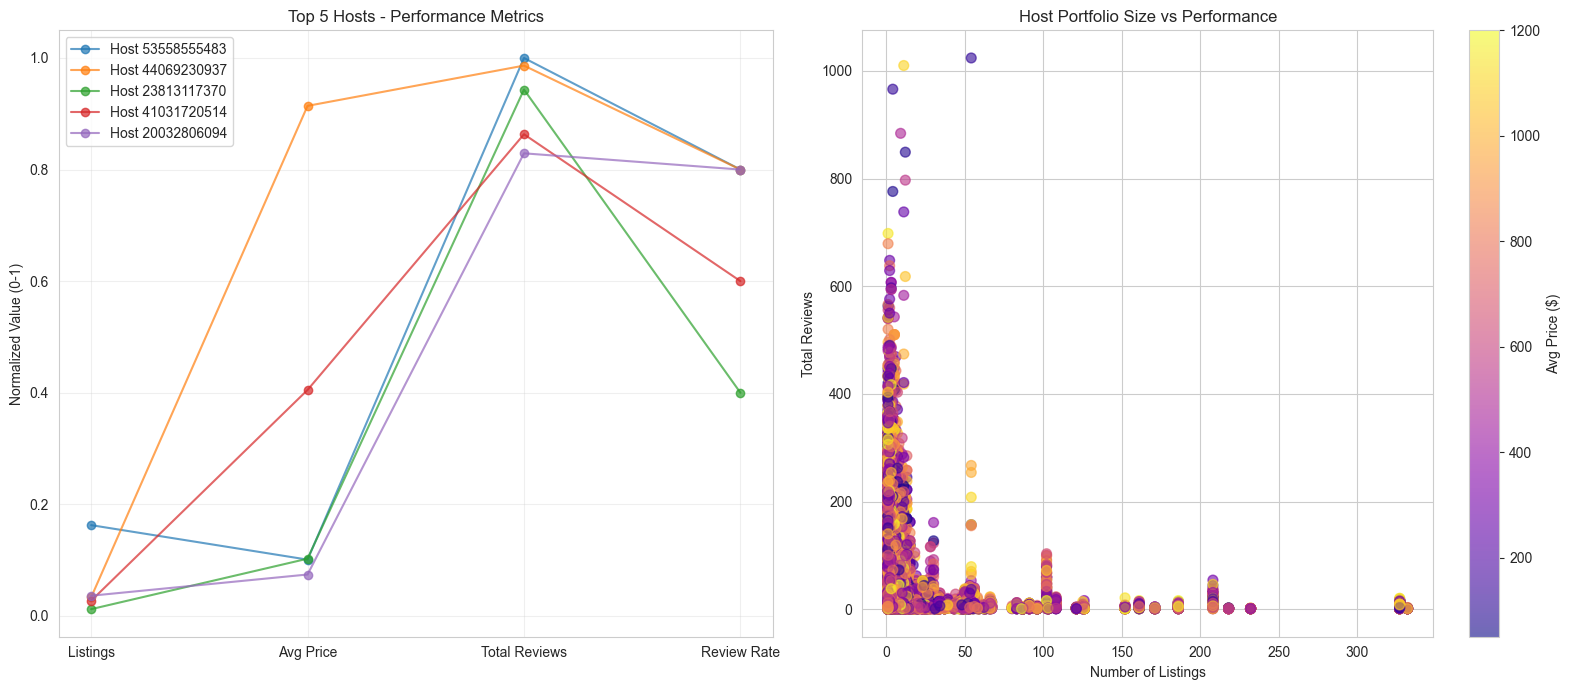

In [320]:
print("\n3.6 HOST PERFORMANCE DASHBOARD")
print("-"*80)

# Aggregate host metrics
host_metrics = df.groupby('host_id').agg({
    'calculated_host_listings_count': 'first',
    'host_identity_verified': 'first',
    'price': 'mean',
    'number_of_reviews': 'sum',
    'review_rate_number': 'mean'
}).reset_index()

# Get top 10 hosts by total reviews
top_hosts = host_metrics.nlargest(10, 'number_of_reviews')

print("\nTop 10 Hosts by Total Reviews:")
print(top_hosts[['host_id', 'calculated_host_listings_count', 'price', 'number_of_reviews']])

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Parallel coordinates style visualization
categories = ['Listings', 'Avg Price', 'Total Reviews', 'Review Rate']
for idx, row in top_hosts.head(5).iterrows():
    # Normalize values to 0-1 scale
    values = [
        row['calculated_host_listings_count'] / host_metrics['calculated_host_listings_count'].max(),
        row['price'] / host_metrics['price'].max(),
        row['number_of_reviews'] / host_metrics['number_of_reviews'].max(),
        row['review_rate_number'] / host_metrics['review_rate_number'].max()
    ]
    axes[0].plot(categories, values, marker='o', label=f"Host {row['host_id']}", alpha=0.7)

axes[0].set_ylabel('Normalized Value (0-1)')
axes[0].set_title('Top 5 Hosts - Performance Metrics')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter: listings vs performance
axes[1].scatter(host_metrics['calculated_host_listings_count'],
               host_metrics['number_of_reviews'],
               c=host_metrics['price'], cmap='plasma', alpha=0.6, s=50)
axes[1].set_xlabel('Number of Listings')
axes[1].set_ylabel('Total Reviews')
axes[1].set_title('Host Portfolio Size vs Performance')
plt.colorbar(axes[1].collections[0], ax=axes[1], label='Avg Price ($)')

plt.tight_layout()
plt.show()


3.7 AVAILABILITY-PRICE-REVIEWS NEXUS
--------------------------------------------------------------------------------


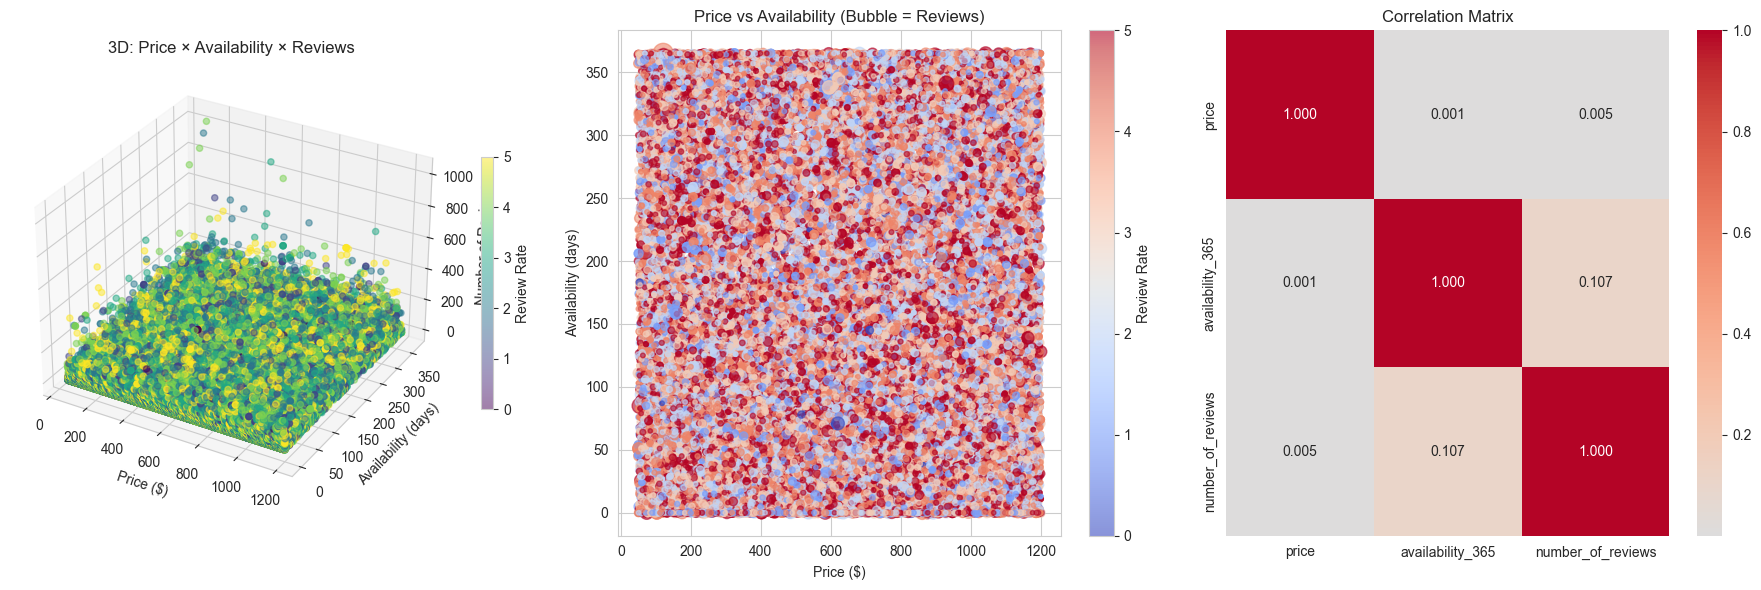

In [321]:
print("\n3.7 AVAILABILITY-PRICE-REVIEWS NEXUS")
print("-"*80)

fig = plt.figure(figsize=(18, 6))

# 3D scatter
ax1 = fig.add_subplot(131, projection='3d')
scatter = ax1.scatter(df['price'], df['availability_365'], df['number_of_reviews'],
                     c=df['review_rate_number'], cmap='viridis', alpha=0.5)
ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Availability (days)')
ax1.set_zlabel('Number of Reviews')
ax1.set_title('3D: Price × Availability × Reviews')
plt.colorbar(scatter, ax=ax1, label='Review Rate', shrink=0.5)

# Bubble chart
ax2 = fig.add_subplot(132)
sizes = (df['number_of_reviews'] / df['number_of_reviews'].max()) * 200 + 10
scatter2 = ax2.scatter(df['price'], df['availability_365'], s=sizes,
                      c=df['review_rate_number'], cmap='coolwarm', alpha=0.6)
ax2.set_xlabel('Price ($)')
ax2.set_ylabel('Availability (days)')
ax2.set_title('Price vs Availability (Bubble = Reviews)')
plt.colorbar(scatter2, ax=ax2, label='Review Rate')

# Pair plot simulation (correlation matrix visualization)
ax3 = fig.add_subplot(133)
corr_matrix = df[['price', 'availability_365', 'number_of_reviews']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, ax=ax3)
ax3.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()



3.8 COUNTRY-WISE COMPREHENSIVE COMPARISON
--------------------------------------------------------------------------------

Country-wise Statistics:
                    price  number_of_reviews  availability_365  \
country                                                          
United States  626.662496          31.954575        135.684488   

               review_rate_number  count  
country                                   
United States            3.280047  81122  


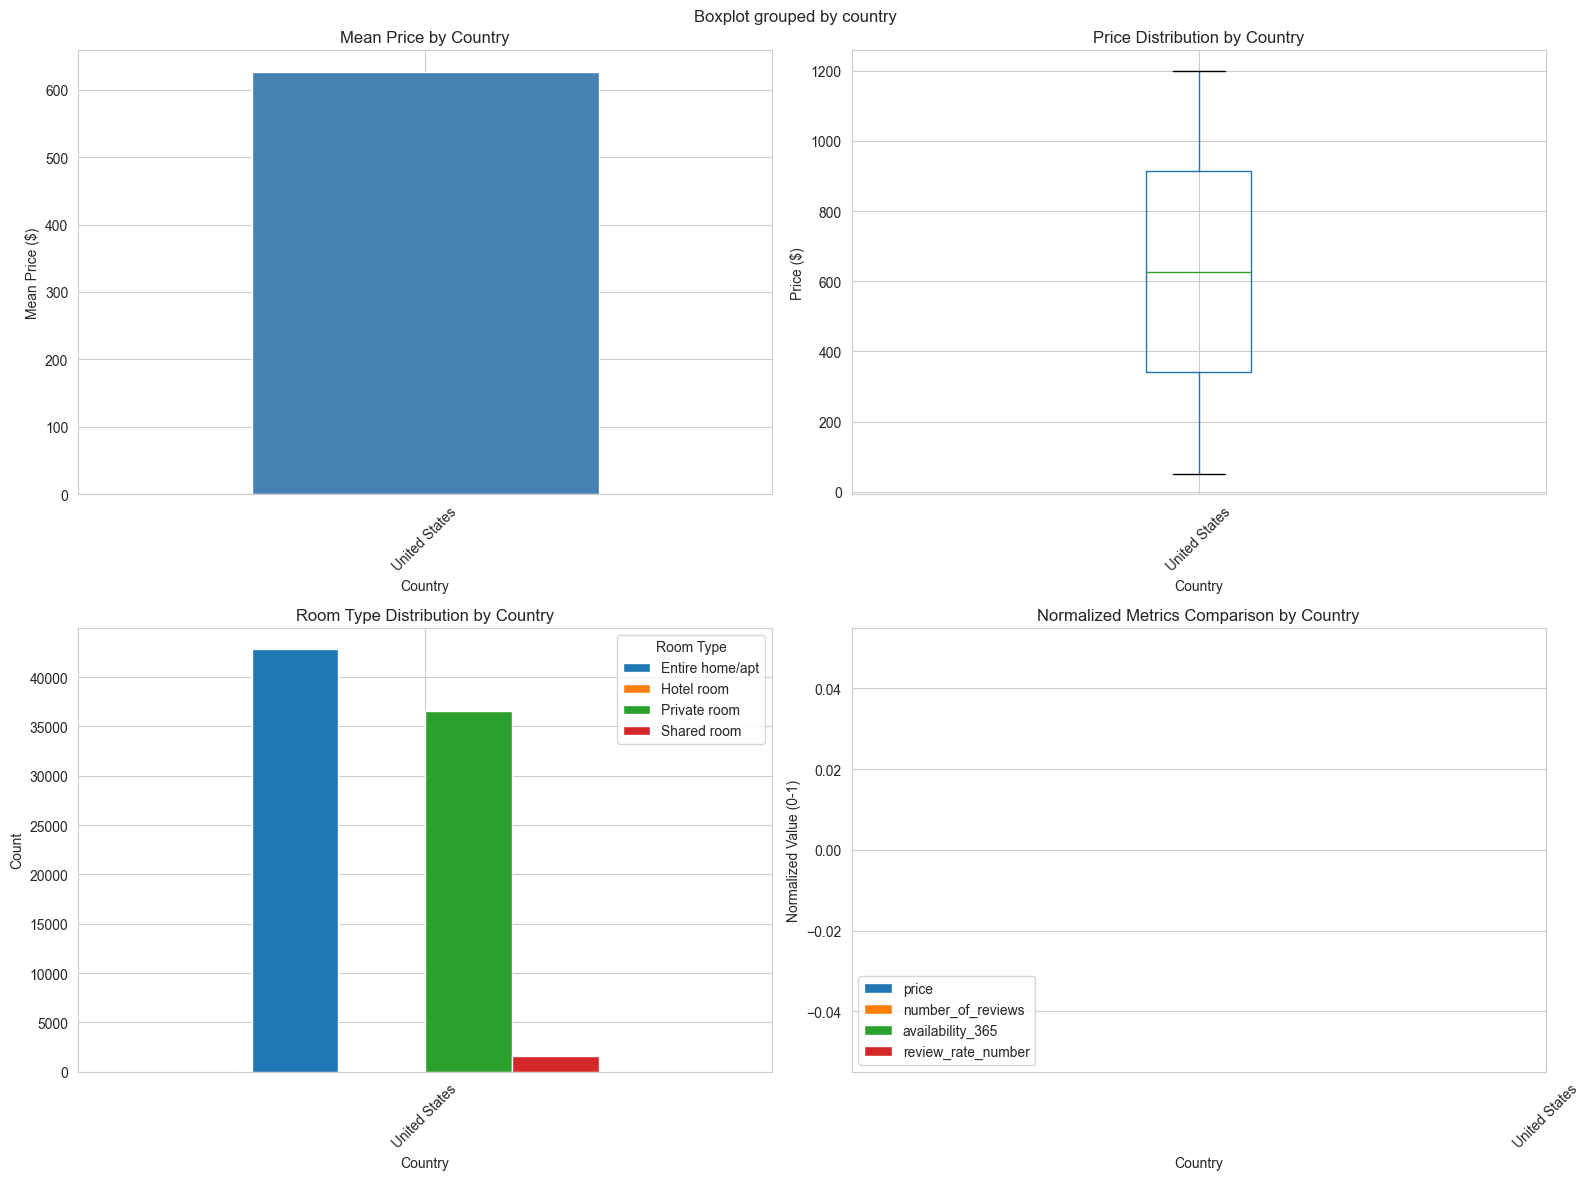

In [322]:
print("\n3.8 COUNTRY-WISE COMPREHENSIVE COMPARISON")
print("-"*80)

country_stats = df.groupby('country').agg({
    'price': 'mean',
    'number_of_reviews': 'mean',
    'availability_365': 'mean',
    'review_rate_number': 'mean',
    'id': 'count'
}).rename(columns={'id': 'count'})

print("\nCountry-wise Statistics:")
print(country_stats)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean price by country
country_stats['price'].plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Mean Price ($)')
axes[0, 0].set_title('Mean Price by Country')
axes[0, 0].tick_params(axis='x', rotation=45)

# Box plot of prices
df.boxplot(column='price', by='country', ax=axes[0, 1])
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Price Distribution by Country')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# Room type distribution by country
room_country = pd.crosstab(df['country'], df['room_type'])
room_country.plot(kind='bar', stacked=False, ax=axes[1, 0])
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Room Type Distribution by Country')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Room Type')

# Multi-metric comparison
x_pos = np.arange(len(country_stats))
width = 0.2
metrics_normalized = country_stats[['price', 'number_of_reviews', 'availability_365', 'review_rate_number']].copy()
for col in metrics_normalized.columns:
    metrics_normalized[col] = (metrics_normalized[col] - metrics_normalized[col].min()) / (metrics_normalized[col].max() - metrics_normalized[col].min())

for i, col in enumerate(metrics_normalized.columns):
    axes[1, 1].bar(x_pos + i*width, metrics_normalized[col], width, label=col)

axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Normalized Value (0-1)')
axes[1, 1].set_title('Normalized Metrics Comparison by Country')
axes[1, 1].set_xticks(x_pos + width * 1.5)
axes[1, 1].set_xticklabels(country_stats.index, rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

#### Distribution & Skewness Analysis


4.1 PRICE DISTRIBUTION NORMALITY
--------------------------------------------------------------------------------

Shapiro-Wilk Test:
Statistic: 0.955090
P-value: 0.000000
Normal distribution: No

Anderson-Darling Test:
Statistic: 887.573617
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


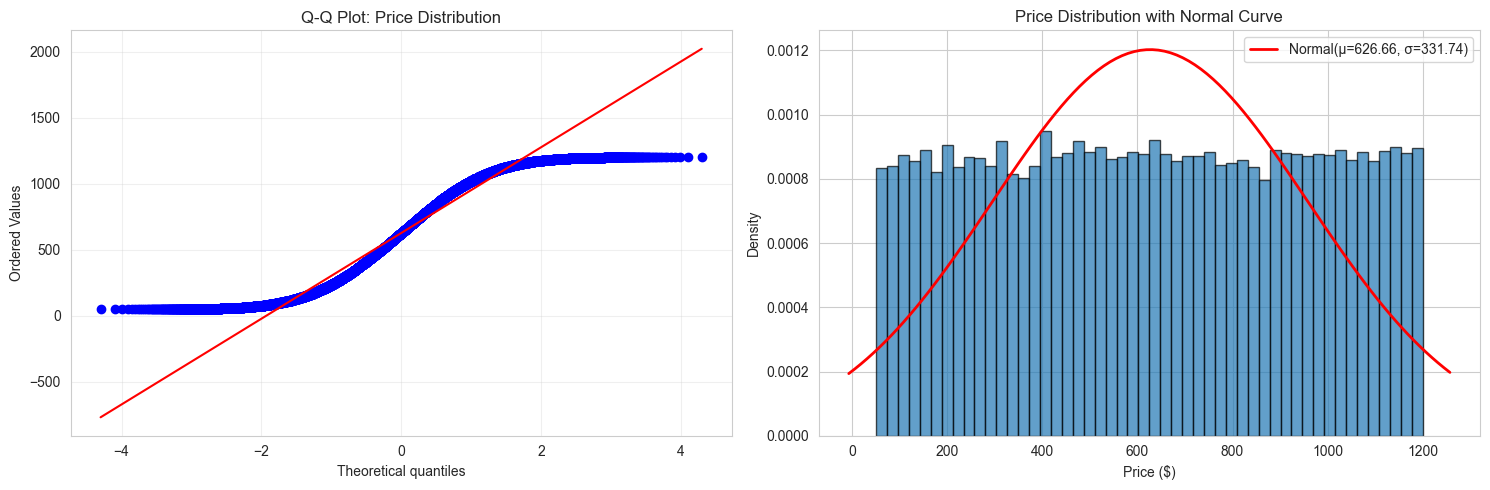

In [323]:
print("\n4.1 PRICE DISTRIBUTION NORMALITY")
print("-"*80)

# Shapiro-Wilk test (use sample if data is large)
sample_price = df['price'].dropna().sample(min(5000, len(df['price'].dropna())))
shapiro_stat, shapiro_p = shapiro(sample_price)
print(f"\nShapiro-Wilk Test:")
print(f"Statistic: {shapiro_stat:.6f}")
print(f"P-value: {shapiro_p:.6f}")
print(f"Normal distribution: {'Yes' if shapiro_p > 0.05 else 'No'}")

# Anderson-Darling test
anderson_result = anderson(df['price'].dropna())
print(f"\nAnderson-Darling Test:")
print(f"Statistic: {anderson_result.statistic:.6f}")
print(f"Critical values: {anderson_result.critical_values}")
print(f"Significance levels: {anderson_result.significance_level}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Q-Q plot
stats.probplot(df['price'].dropna(), dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot: Price Distribution')
axes[0].grid(True, alpha=0.3)

# Histogram with normal curve overlay
mu = df['price'].mean()
sigma = df['price'].std()
n, bins, patches = axes[1].hist(df['price'], bins=50, density=True, alpha=0.7, edgecolor='black')
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
axes[1].plot(x, p, 'r-', linewidth=2, label=f'Normal(μ={mu:.2f}, σ={sigma:.2f})')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Density')
axes[1].set_title('Price Distribution with Normal Curve')
axes[1].legend()

plt.tight_layout()
plt.show()


4.2 REVIEW METRICS SKEWNESS
--------------------------------------------------------------------------------

Number of Reviews:
Skewness: 3.6591
Kurtosis: 23.3295

Reviews per Month:
Skewness: 7.1564
Kurtosis: 221.7382


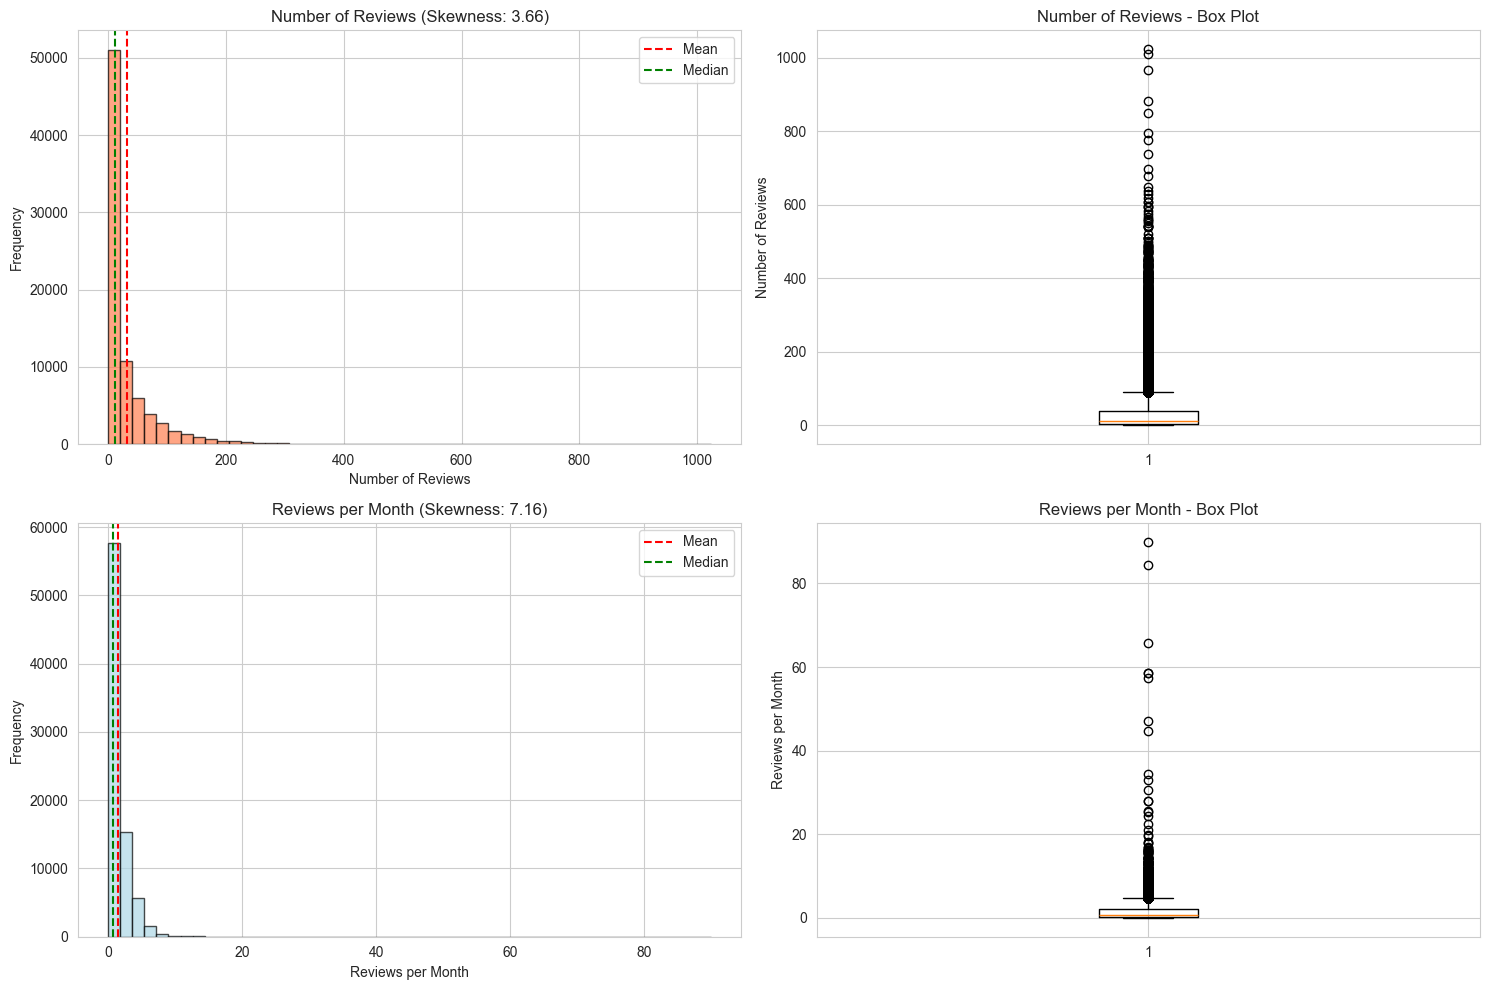

In [326]:
print("\n4.2 REVIEW METRICS SKEWNESS")
print("-"*80)

reviews_skew = skew(df['number_of_reviews'].dropna())
reviews_kurt = kurtosis(df['number_of_reviews'].dropna())
reviews_month_skew = skew(df['reviews_per_month'].dropna())
reviews_month_kurt = kurtosis(df['reviews_per_month'].dropna())

print(f"\nNumber of Reviews:")
print(f"Skewness: {reviews_skew:.4f}")
print(f"Kurtosis: {reviews_kurt:.4f}")
print(f"\nReviews per Month:")
print(f"Skewness: {reviews_month_skew:.4f}")
print(f"Kurtosis: {reviews_month_kurt:.4f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Number of reviews - distribution with skewness
axes[0, 0].hist(df['number_of_reviews'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 0].axvline(df['number_of_reviews'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].axvline(df['number_of_reviews'].median(), color='green', linestyle='--', label='Median')
axes[0, 0].set_xlabel('Number of Reviews')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title(f'Number of Reviews (Skewness: {reviews_skew:.2f})')
axes[0, 0].legend()

# Number of reviews - box plot
axes[0, 1].boxplot(df['number_of_reviews'].dropna(), vert=True)
axes[0, 1].set_ylabel('Number of Reviews')
axes[0, 1].set_title('Number of Reviews - Box Plot')

# Reviews per month - distribution
axes[1, 0].hist(df['reviews_per_month'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='lightblue')
axes[1, 0].axvline(df['reviews_per_month'].mean(), color='red', linestyle='--', label='Mean')
axes[1, 0].axvline(df['reviews_per_month'].median(), color='green', linestyle='--', label='Median')
axes[1, 0].set_xlabel('Reviews per Month')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f'Reviews per Month (Skewness: {reviews_month_skew:.2f})')
axes[1, 0].legend()

# Reviews per month - box plot
axes[1, 1].boxplot(df['reviews_per_month'].dropna(), vert=True)
axes[1, 1].set_ylabel('Reviews per Month')
axes[1, 1].set_title('Reviews per Month - Box Plot')

plt.tight_layout()
plt.show()


4.3 SERVICE FEE DISTRIBUTION TEST
--------------------------------------------------------------------------------

Kolmogorov-Smirnov Test:
Statistic: 0.061235
P-value: 0.000000
Normal distribution: No


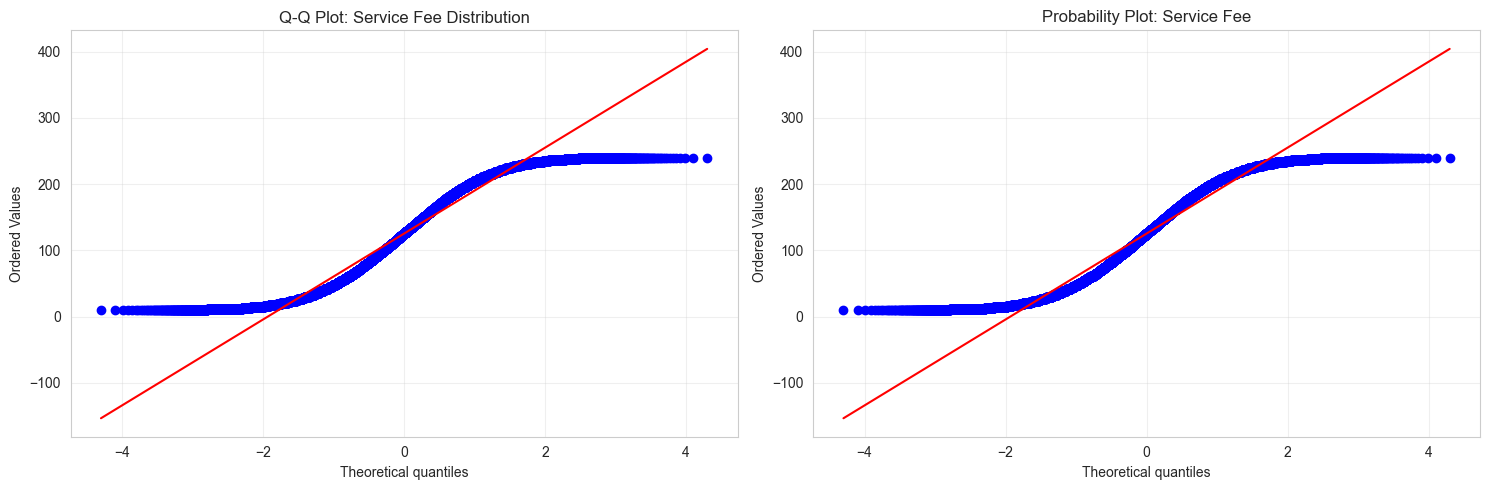

In [339]:
print("\n4.3 SERVICE FEE DISTRIBUTION TEST")
print("-"*80)

# Kolmogorov-Smirnov test
ks_stat, ks_p = kstest(df['service_fee'].dropna(), 'norm',
                       args=(df['service_fee'].mean(), df['service_fee'].std()))
print(f"\nKolmogorov-Smirnov Test:")
print(f"Statistic: {ks_stat:.6f}")
print(f"P-value: {ks_p:.6f}")
print(f"Normal distribution: {'Yes' if ks_p > 0.05 else 'No'}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Q-Q plot
stats.probplot(df['service_fee'].dropna(), dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot: Service Fee Distribution')
axes[0].grid(True, alpha=0.3)

# Probability plot
stats.probplot(df['service_fee'].dropna(), dist="norm", plot=axes[1])
axes[1].set_title('Probability Plot: Service Fee')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


4.4 COMPARATIVE DISTRIBUTION ANALYSIS
--------------------------------------------------------------------------------

Levene's Test (Variance Equality):
Statistic: 1.2766
P-value: 0.2805
Equal variances: Yes

Kruskal-Wallis Test:
Statistic: 1.7538
P-value: 0.6250
Significant difference: No


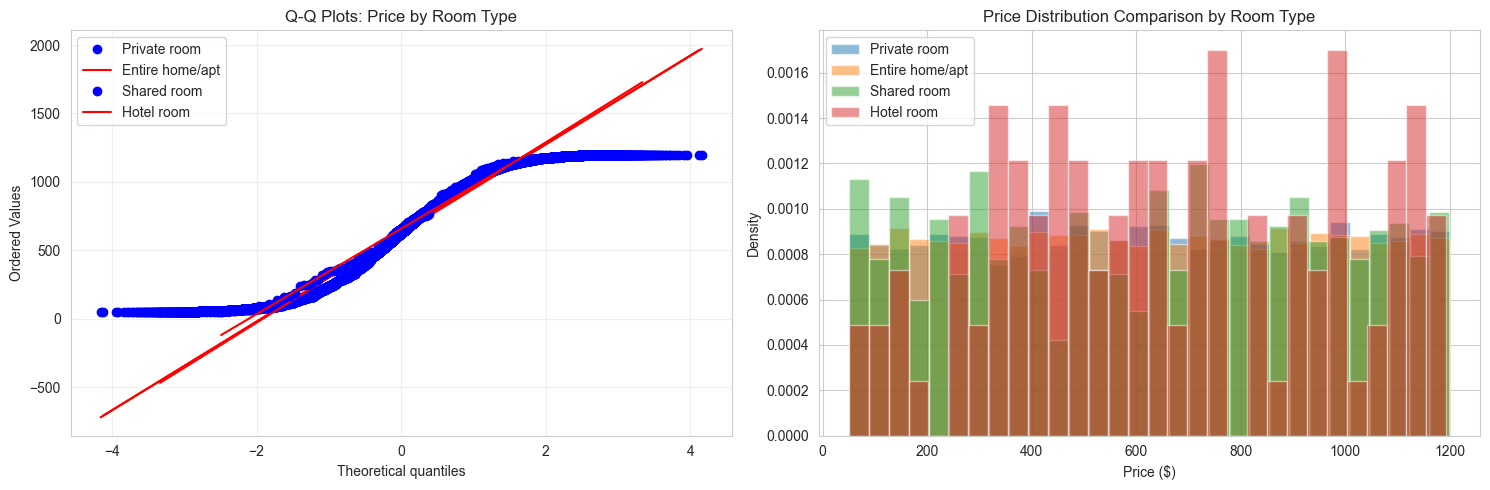

In [328]:
print("\n4.4 COMPARATIVE DISTRIBUTION ANALYSIS")
print("-"*80)

# Levene's test for variance equality
room_types = df['room_type'].unique()
price_by_room = [df[df['room_type'] == rt]['price'].dropna() for rt in room_types]
levene_stat, levene_p = levene(*price_by_room)

print(f"\nLevene's Test (Variance Equality):")
print(f"Statistic: {levene_stat:.4f}")
print(f"P-value: {levene_p:.4f}")
print(f"Equal variances: {'Yes' if levene_p > 0.05 else 'No'}")

# Kruskal-Wallis test
kruskal_stat, kruskal_p = kruskal(*price_by_room)
print(f"\nKruskal-Wallis Test:")
print(f"Statistic: {kruskal_stat:.4f}")
print(f"P-value: {kruskal_p:.4f}")
print(f"Significant difference: {'Yes' if kruskal_p < 0.05 else 'No'}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Multiple Q-Q plots
for i, rt in enumerate(room_types[:4]):  # Limit to 4 for visibility
    room_data = df[df['room_type'] == rt]['price'].dropna()
    stats.probplot(room_data, dist="norm", plot=axes[0])

axes[0].set_title('Q-Q Plots: Price by Room Type')
axes[0].legend(room_types[:4])
axes[0].grid(True, alpha=0.3)

# Distribution comparison
for rt in room_types:
    room_data = df[df['room_type'] == rt]['price'].dropna()
    axes[1].hist(room_data, bins=30, alpha=0.5, label=rt, density=True)

axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Density')
axes[1].set_title('Price Distribution Comparison by Room Type')
axes[1].legend()

plt.tight_layout()
plt.show()

##### Advance Statistical Objectives


5.1 PRICE SEGMENTATION & PROFILING
--------------------------------------------------------------------------------

Price Segment Profiles:
                     price                number_of_reviews  \
                      mean    min     max              mean   
price_segment                                                 
Budget          195.746913   50.0   341.0         31.503173   
Mid-range       627.281925  342.0   915.0         31.960877   
Luxury         1058.295606  916.0  1200.0         32.395394   

              review_rate_number availability_365 minimum_nights service_fee  
                            mean             mean           mean        mean  
price_segment                                                                 
Budget                  3.279410       136.183124       7.267355   39.150357  
Mid-range               3.293339       135.037422       7.185854  125.455083  
Luxury                  3.254040       136.480848       7.176444  211.664360  


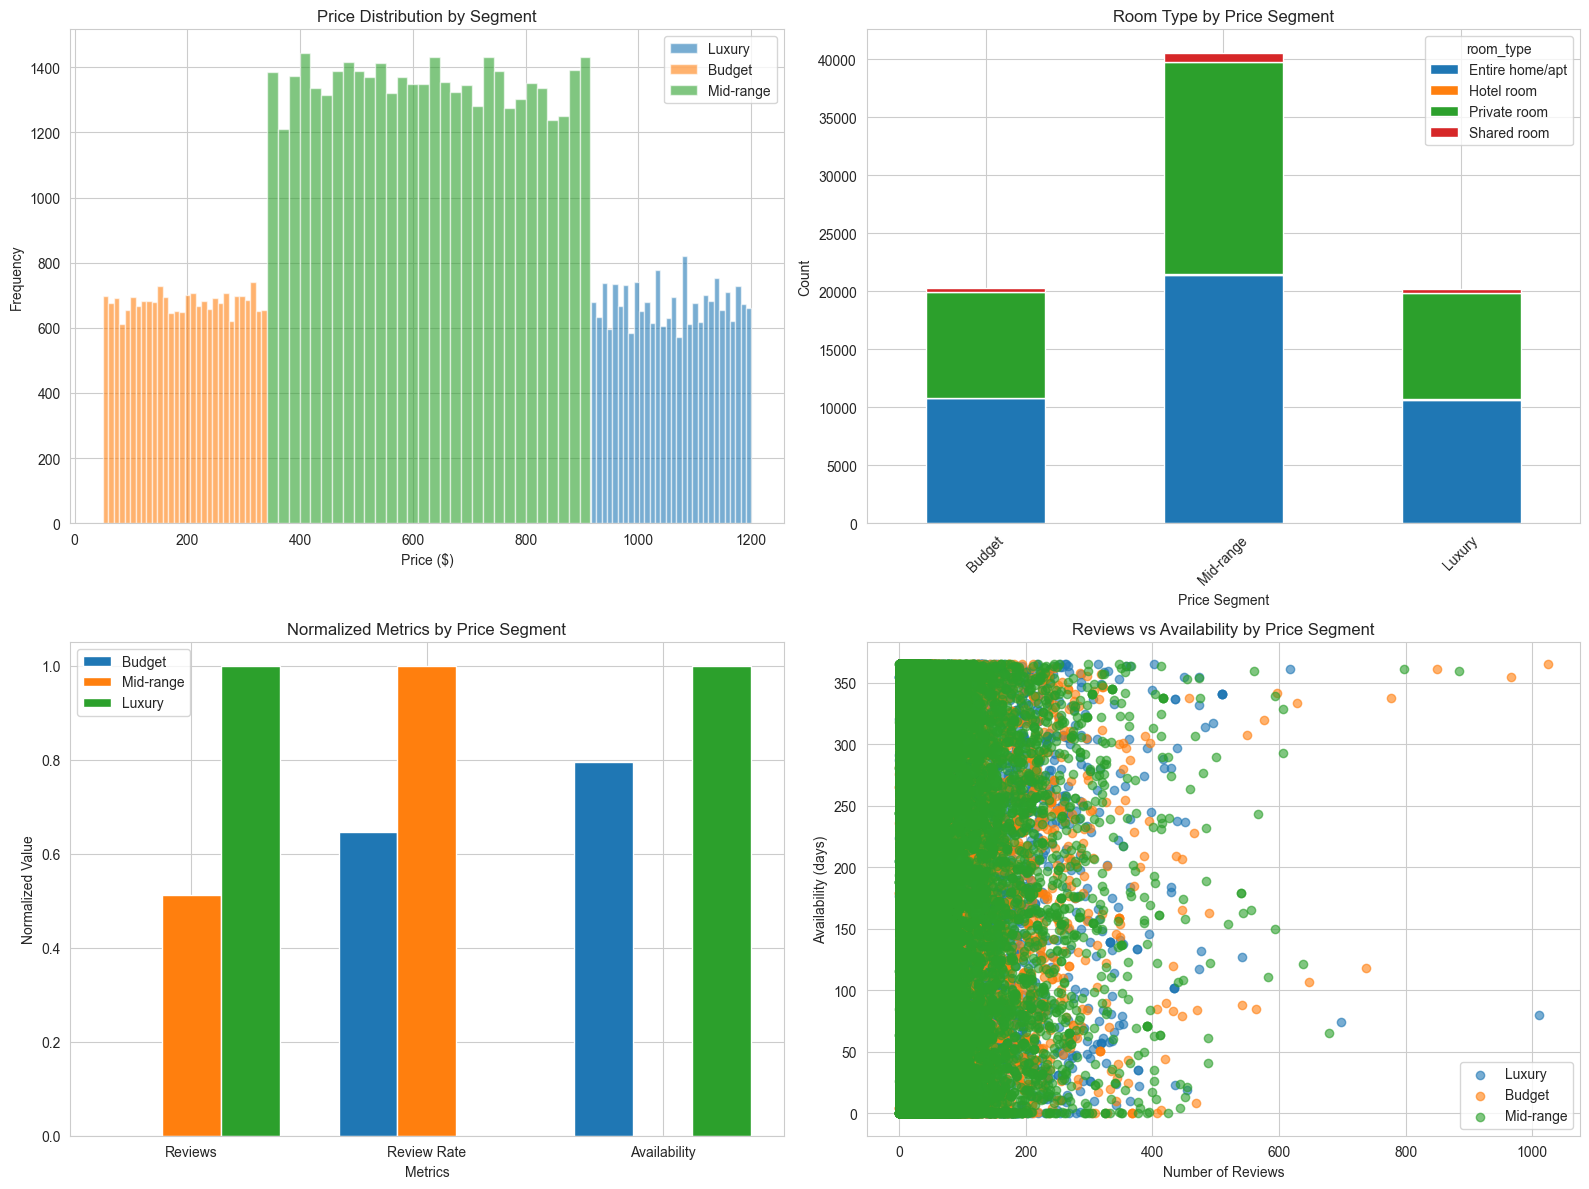

In [332]:
print("\n5.1 PRICE SEGMENTATION & PROFILING")
print("-"*80)

# Profile characteristics by price segment
segment_profile = df.groupby('price_segment').agg({
    'price': ['mean', 'min', 'max'],
    'number_of_reviews': 'mean',
    'review_rate_number': 'mean',
    'availability_365': 'mean',
    'minimum_nights': 'mean',
    'service_fee': 'mean'
})

print("\nPrice Segment Profiles:")
print(segment_profile)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Price distribution by segment
for segment in df['price_segment'].dropna().unique():
    segment_data = df[df['price_segment'] == segment]['price']
    axes[0, 0].hist(segment_data, bins=30, alpha=0.6, label=segment)

axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Distribution by Segment')
axes[0, 0].legend()

# Room type distribution by segment
room_segment = pd.crosstab(df['price_segment'], df['room_type'])
room_segment.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Price Segment')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Room Type by Price Segment')
axes[0, 1].tick_params(axis='x', rotation=45)

# Average metrics by segment
metrics = ['number_of_reviews', 'review_rate_number', 'availability_365']
segment_metrics = df.groupby('price_segment')[metrics].mean()
segment_metrics_norm = (segment_metrics - segment_metrics.min()) / (segment_metrics.max() - segment_metrics.min())

x = np.arange(len(metrics))
width = 0.25
for i, segment in enumerate(segment_metrics_norm.index):
    axes[1, 0].bar(x + i*width, segment_metrics_norm.loc[segment], width, label=segment)

axes[1, 0].set_xlabel('Metrics')
axes[1, 0].set_ylabel('Normalized Value')
axes[1, 0].set_title('Normalized Metrics by Price Segment')
axes[1, 0].set_xticks(x + width)
axes[1, 0].set_xticklabels(['Reviews', 'Review Rate', 'Availability'])
axes[1, 0].legend()

# Scatter plot colored by segment
for segment in df['price_segment'].dropna().unique():
    segment_data = df[df['price_segment'] == segment]
    axes[1, 1].scatter(segment_data['number_of_reviews'],
                      segment_data['availability_365'],
                      label=segment, alpha=0.6)

axes[1, 1].set_xlabel('Number of Reviews')
axes[1, 1].set_ylabel('Availability (days)')
axes[1, 1].set_title('Reviews vs Availability by Price Segment')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


5.3 TIME-BASED REVIEW PATTERNS
--------------------------------------------------------------------------------

Reviews by Month:
review_month
1      8478
2      6930
3      3627
4      3711
5      8062
6     22058
7      9894
8      3511
9      3405
10     3572
11     2887
12     4987
Name: count, dtype: int64


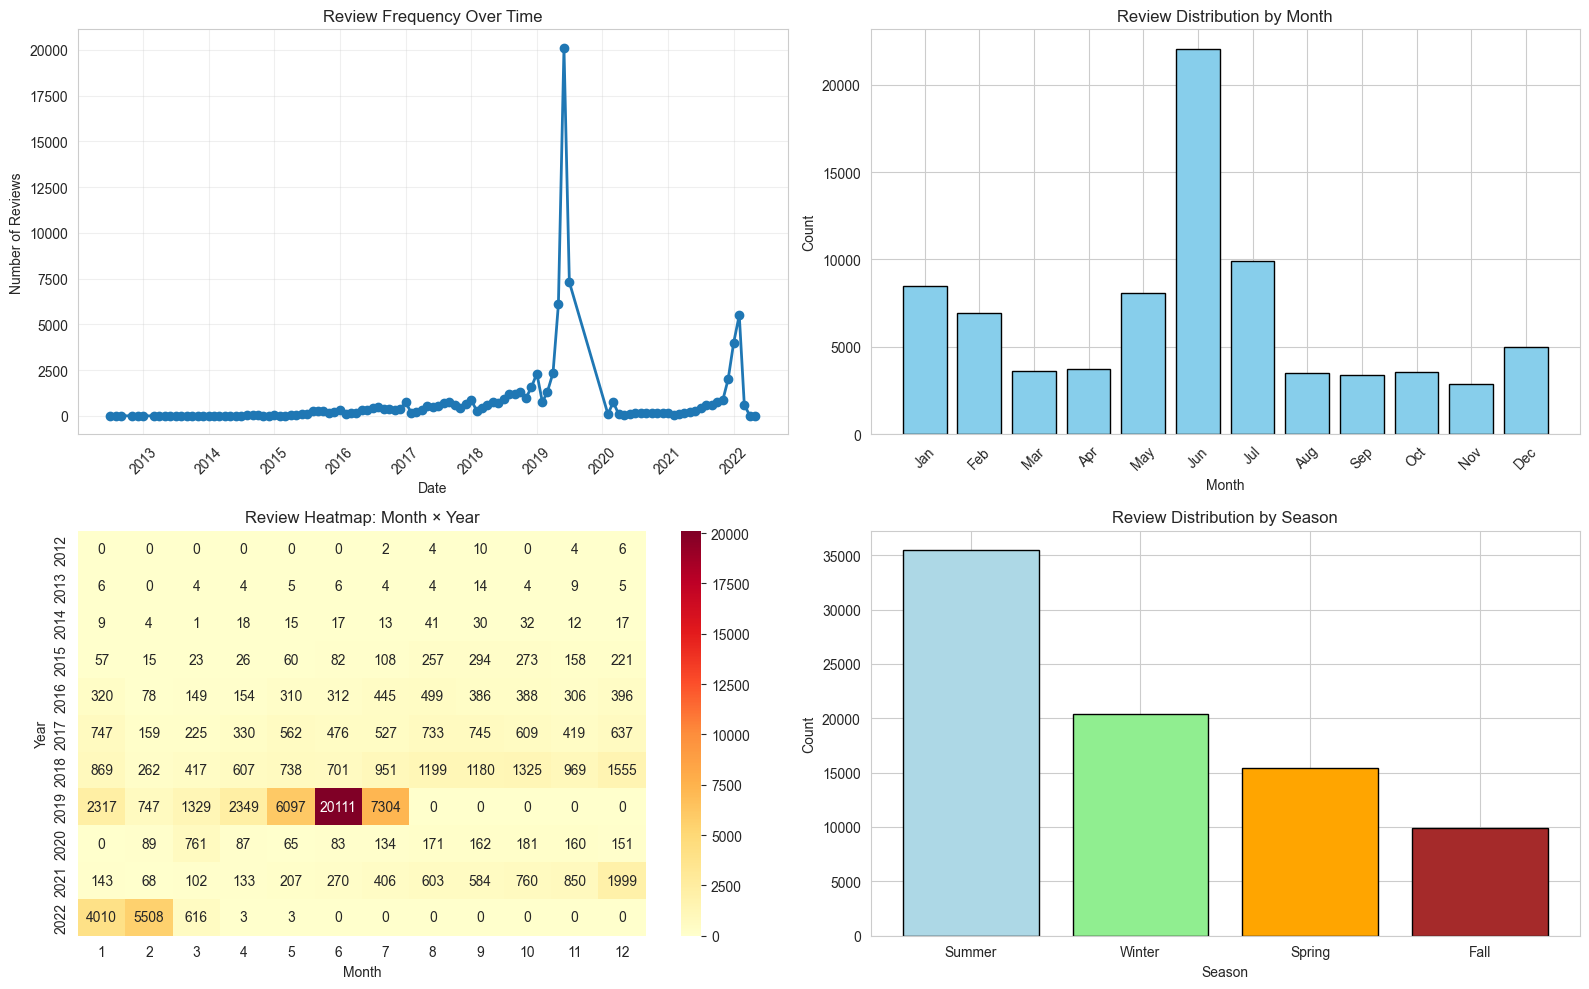

In [333]:
print("\n5.3 TIME-BASED REVIEW PATTERNS")
print("-"*80)

# Extract month and year from last_review
df['review_month'] = df['last_review'].dt.month
df['review_year'] = df['last_review'].dt.year

# Monthly distribution
monthly_reviews = df['review_month'].value_counts().sort_index()
print("\nReviews by Month:")
print(monthly_reviews)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Time series plot (monthly aggregation)
monthly_counts = df.groupby(df['last_review'].dt.to_period('M')).size()
monthly_counts.index = monthly_counts.index.to_timestamp()
axes[0, 0].plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2)
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Reviews')
axes[0, 0].set_title('Review Frequency Over Time')
axes[0, 0].grid(True, alpha=0.3)
plt.sca(axes[0, 0])
plt.xticks(rotation=45)

# Monthly bar chart
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0, 1].bar(monthly_reviews.index, monthly_reviews.values, color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Review Distribution by Month')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names, rotation=45)

# Heatmap (month × year)
if len(df['review_year'].dropna().unique()) > 1:
    heatmap_data = df.groupby(['review_year', 'review_month']).size().unstack(fill_value=0)
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1, 0])
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Year')
    axes[1, 0].set_title('Review Heatmap: Month × Year')

# Seasonal pattern
df['season'] = df['review_month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
seasonal_reviews = df['season'].value_counts()
axes[1, 1].bar(seasonal_reviews.index, seasonal_reviews.values,
               color=['lightblue', 'lightgreen', 'orange', 'brown'], edgecolor='black')
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Review Distribution by Season')

plt.tight_layout()
plt.show()


5.4 CORRELATION MATRIX DEEP DIVE
--------------------------------------------------------------------------------

Top 10 Positive Correlations:
service_fee                     price                             0.999991
reviews_per_month               number_of_reviews                 0.592564
availability_365                calculated_host_listings_count    0.148502
calculated_host_listings_count  minimum_nights                    0.126625
long                            reviews_per_month                 0.118325
availability_365                number_of_reviews                 0.107001
                                reviews_per_month                 0.098548
                                minimum_nights                    0.088325
long                            availability_365                  0.087297
                                lat                               0.073148
dtype: float64

Top 10 Negative Correlations:
lat                             availability_365          

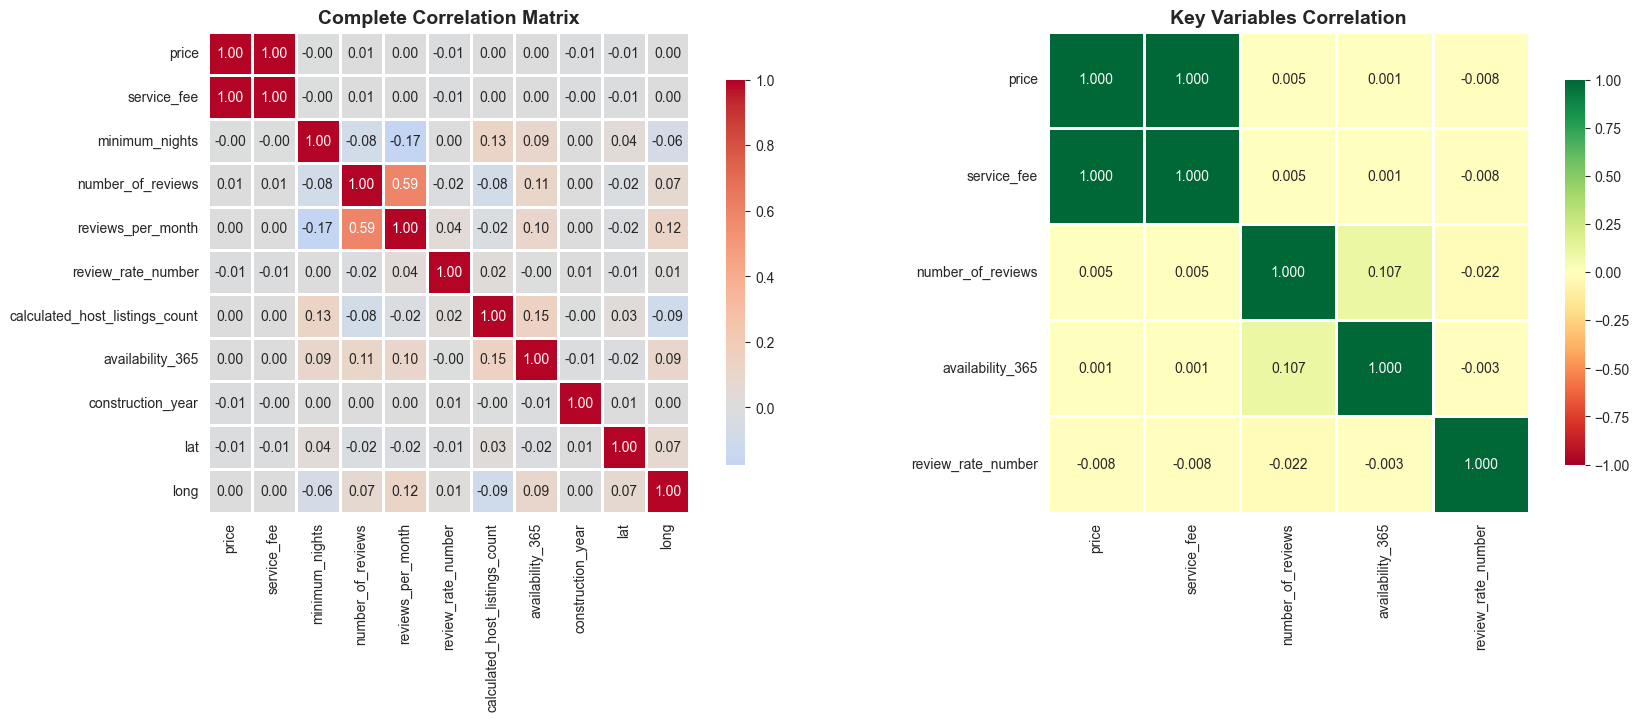


Generating pair plot for key variables...


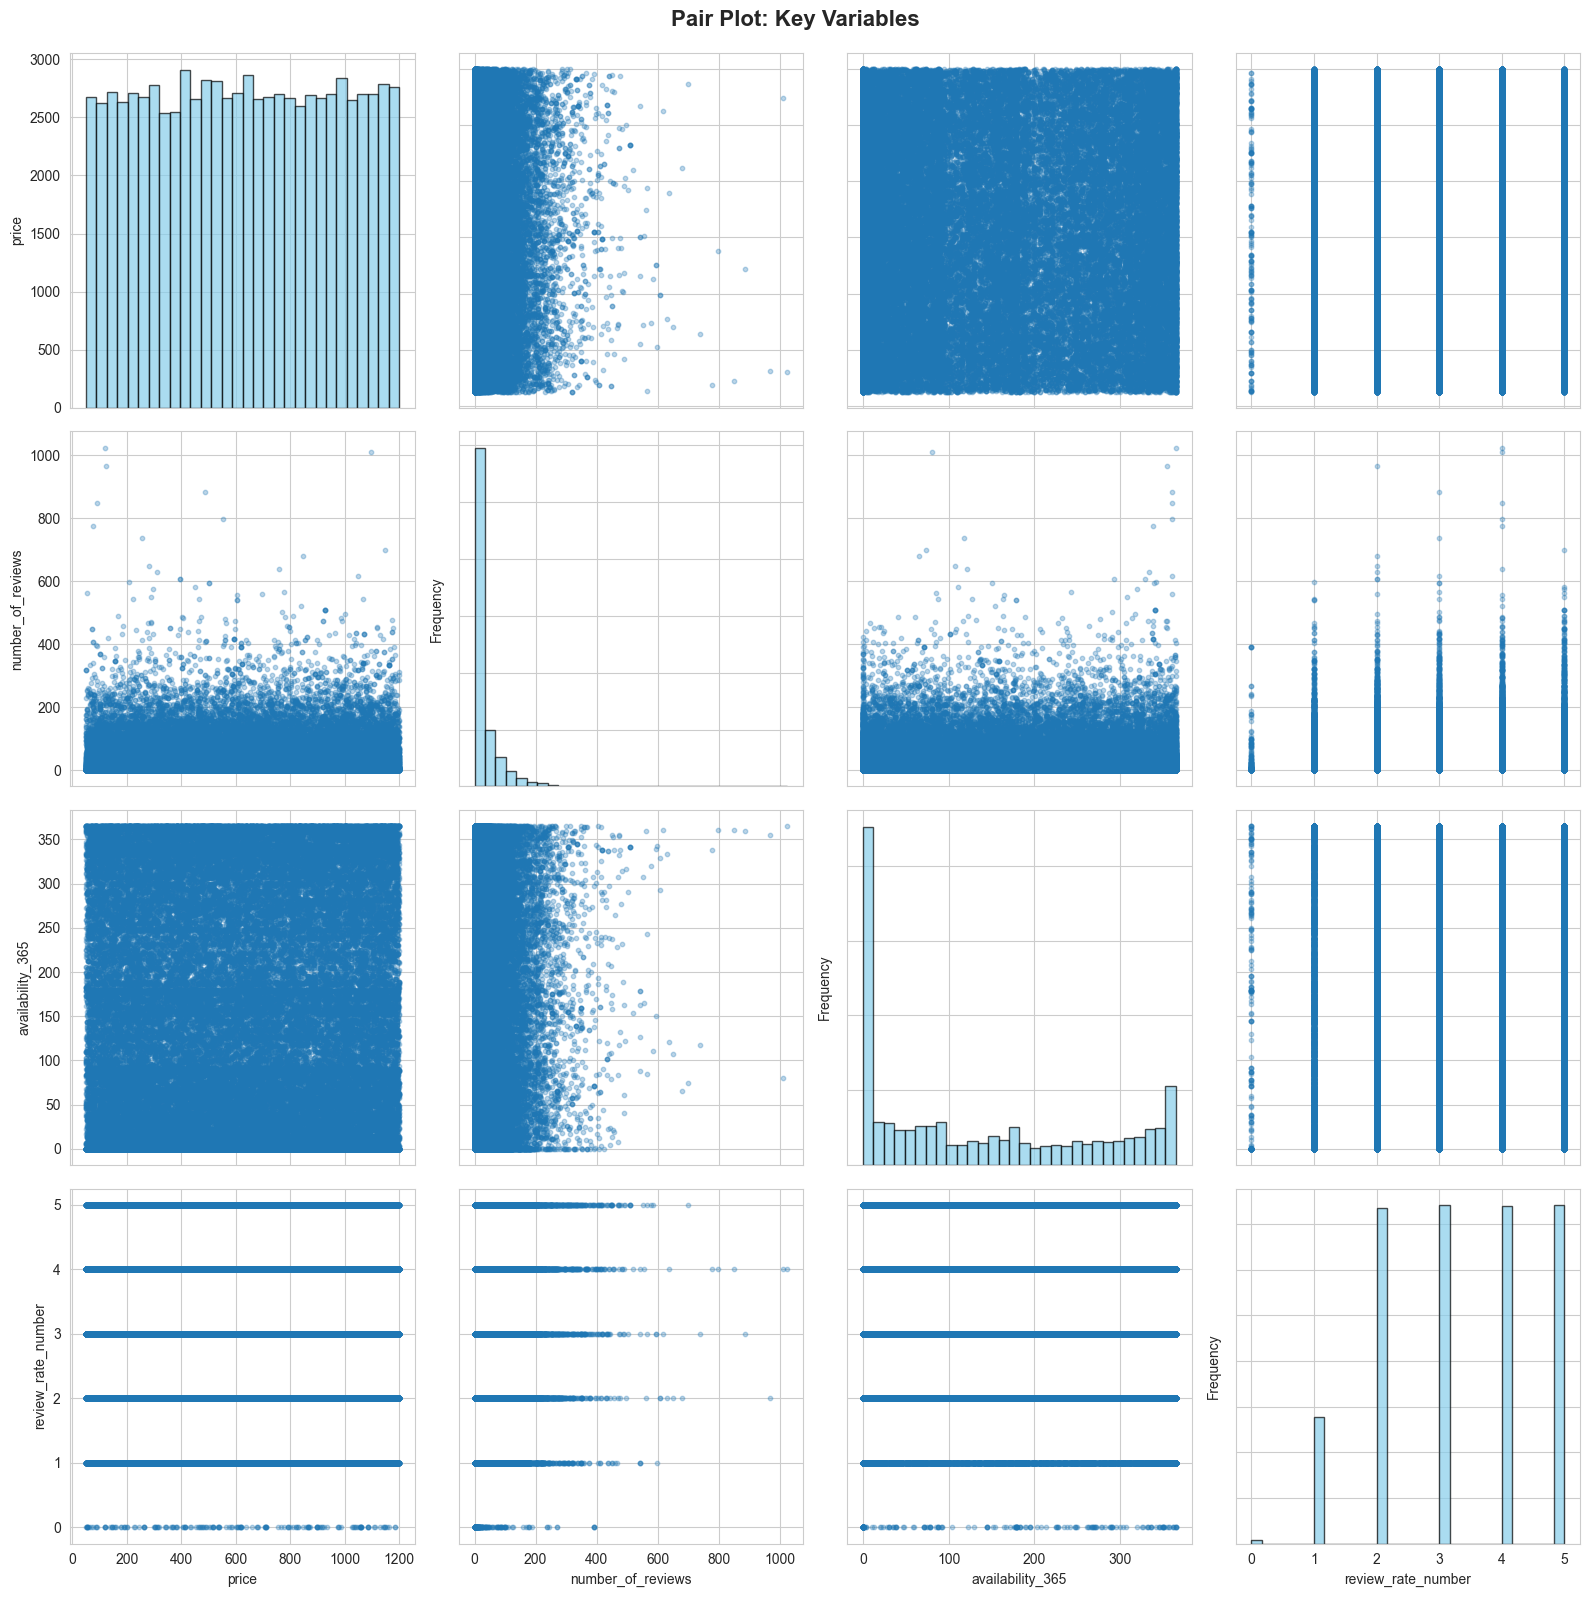

In [334]:
print("\n5.4 CORRELATION MATRIX DEEP DIVE")
print("-"*80)

# Select numerical features for correlation analysis
numerical_features = ['price', 'service_fee', 'minimum_nights', 'number_of_reviews',
                     'reviews_per_month', 'review_rate_number',
                     'calculated_host_listings_count', 'availability_365',
                     'construction_year', 'lat', 'long']

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

print("\nTop 10 Positive Correlations:")
# Get upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
correlations = upper_triangle.unstack().dropna().sort_values(ascending=False)
print(correlations.head(10))

print("\nTop 10 Negative Correlations:")
print(correlations.tail(10))

# Identify multicollinearity (correlation > 0.8 or < -0.8)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("\nMulticollinearity Issues (|correlation| > 0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.4f}")
else:
    print("\nNo significant multicollinearity issues detected.")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Correlation heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, ax=axes[0],
            cbar_kws={"shrink": 0.8})
axes[0].set_title('Complete Correlation Matrix', fontsize=14, fontweight='bold')

# Select key variables for pair plot visualization
key_vars = ['price', 'service_fee', 'number_of_reviews', 'availability_365', 'review_rate_number']
key_corr = df[key_vars].corr()

sns.heatmap(key_corr, annot=True, fmt='.3f', cmap='RdYlGn',
            center=0, square=True, linewidths=2, ax=axes[1],
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)
axes[1].set_title('Key Variables Correlation', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Create pair plot for selected variables
print("\nGenerating pair plot for key variables...")
fig = plt.figure(figsize=(16, 16))

selected_vars = ['price', 'number_of_reviews', 'availability_365', 'review_rate_number']
n_vars = len(selected_vars)

for i in range(n_vars):
    for j in range(n_vars):
        ax = plt.subplot(n_vars, n_vars, i * n_vars + j + 1)

        if i == j:
            # Diagonal: histogram
            ax.hist(df[selected_vars[i]].dropna(), bins=30,
                   edgecolor='black', alpha=0.7, color='skyblue')
            ax.set_ylabel('Frequency')
        else:
            # Off-diagonal: scatter plot
            ax.scatter(df[selected_vars[j]], df[selected_vars[i]],
                      alpha=0.3, s=10)

        if i == n_vars - 1:
            ax.set_xlabel(selected_vars[j], fontsize=10)
        else:
            ax.set_xticklabels([])

        if j == 0:
            ax.set_ylabel(selected_vars[i], fontsize=10)
        else:
            ax.set_yticklabels([])

plt.suptitle('Pair Plot: Key Variables', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [335]:
print("SUMMARY STATISTICS AND KEY INSIGHTS")
print("="*80)

print("\n1. PRICE INSIGHTS:")
print(f"   - Average price: ${df['price'].mean():.2f}")
print(f"   - Price range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")
print(f"   - Most common price segment: {df['price_segment'].mode()[0]}")

print("\n2. AVAILABILITY INSIGHTS:")
print(f"   - Average availability: {df['availability_365'].mean():.2f} days/year")
print(f"   - Properties with full availability: {(df['availability_365'] == 365).sum()}")

print("\n3. REVIEW INSIGHTS:")
print(f"   - Average reviews per listing: {df['number_of_reviews'].mean():.2f}")
print(f"   - Average reviews per month: {df['reviews_per_month'].mean():.2f}")
print(f"   - Average review rate: {df['review_rate_number'].mean():.2f}")

print("\n4. HOST INSIGHTS:")
print(f"   - Average listings per host: {df['calculated_host_listings_count'].mean():.2f}")
print(f"   - Verified hosts: {df['host_identity_verified'].sum()} ({df['host_identity_verified'].sum()/len(df)*100:.1f}%)")

print("\n5. ROOM TYPE DISTRIBUTION:")
print(df['room_type'].value_counts())

print("\n6. CANCELLATION POLICY DISTRIBUTION:")
print(df['cancellation_policy'].value_counts())

print("\n7. INSTANT BOOKABLE:")
print(f"   - Instant bookable listings: {df['instant_bookable'].sum()} ({df['instant_bookable'].sum()/len(df)*100:.1f}%)")

print("\n8. GEOGRAPHICAL INSIGHTS:")
print(f"   - Number of countries: {df['country'].nunique()}")
print(f"   - Number of neighbourhoods: {df['neighbourhood'].nunique()}")
if 'neighbourhood_group' in df.columns:
    print(f"   - Number of neighbourhood groups: {df['neighbourhood_group'].nunique()}")

print("\n9. CONSTRUCTION YEAR INSIGHTS:")
print(f"   - Oldest property: {df['construction_year'].min()}")
print(f"   - Newest property: {df['construction_year'].max()}")
print(f"   - Average construction year: {df['construction_year'].mean():.0f}")

print("\n10. MINIMUM NIGHTS:")
print(f"   - Average minimum nights: {df['minimum_nights'].mean():.2f}")
print(f"   - Median minimum nights: {df['minimum_nights'].median():.2f}")

SUMMARY STATISTICS AND KEY INSIGHTS

1. PRICE INSIGHTS:
   - Average price: $626.66
   - Price range: $50.00 - $1200.00
   - Most common price segment: Mid-range

2. AVAILABILITY INSIGHTS:
   - Average availability: 135.68 days/year
   - Properties with full availability: 1818

3. REVIEW INSIGHTS:
   - Average reviews per listing: 31.95
   - Average reviews per month: 1.39
   - Average review rate: 3.28

4. HOST INSIGHTS:
   - Average listings per host: 7.12
   - Verified hosts: 81122 (100.0%)

5. ROOM TYPE DISTRIBUTION:
room_type
Entire home/apt    42838
Private room       36563
Shared room         1613
Hotel room           108
Name: count, dtype: int64

6. CANCELLATION POLICY DISTRIBUTION:
cancellation_policy
moderate    27133
strict      27010
flexible    26979
Name: count, dtype: int64

7. INSTANT BOOKABLE:
   - Instant bookable listings: 40376 (49.8%)

8. GEOGRAPHICAL INSIGHTS:
   - Number of countries: 1
   - Number of neighbourhoods: 223
   - Number of neighbourhood groups: 5

9